Auteur : Antoine Chesnais  
Date dernière version : 29/09/2019  
Description : Ce notebook contient la partie feature engineering et modélisation du set de données des bâtiments de la ville de Seattle nettoyé  
Librairies utilisées : Pandas, Numpy, Matplotlib, Seaborn, bokeh sklearn, XGBoost  
Le fichier 'functions' contenant des fonctions additionnelles doit également être présent dans le répertoire de travail.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Feature-engineering" data-toc-modified-id="Feature-engineering-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Feature engineering</a></span><ul class="toc-item"><li><span><a href="#Création-de-variables-indiquant-la-proportion-d'énergie-issue-de-chaque-source" data-toc-modified-id="Création-de-variables-indiquant-la-proportion-d'énergie-issue-de-chaque-source-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Création de variables indiquant la proportion d'énergie issue de chaque source</a></span></li><li><span><a href="#Sélection-des-bâtiments-non-destinés-à-l'habitation" data-toc-modified-id="Sélection-des-bâtiments-non-destinés-à-l'habitation-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Sélection des bâtiments non destinés à l'habitation</a></span></li><li><span><a href="#Passage-des-variables-qualitatives-en-type-'catégorie'" data-toc-modified-id="Passage-des-variables-qualitatives-en-type-'catégorie'-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Passage des variables qualitatives en type 'catégorie'</a></span></li><li><span><a href="#Codage-de-l'année-de-construction-en-décénnie" data-toc-modified-id="Codage-de-l'année-de-construction-en-décénnie-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Codage de l'année de construction en décénnie</a></span></li></ul></li><li><span><a href="#Sélection-des-variables-explicatives-et-cibles-:" data-toc-modified-id="Sélection-des-variables-explicatives-et-cibles-:-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Sélection des variables explicatives et cibles :</a></span></li><li><span><a href="#Premières-modélisations-:" data-toc-modified-id="Premières-modélisations-:-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Premières modélisations :</a></span><ul class="toc-item"><li><span><a href="#Création-de-fonctions-de-scoring-:" data-toc-modified-id="Création-de-fonctions-de-scoring-:-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Création de fonctions de scoring :</a></span></li><li><span><a href="#Approche-naive-:" data-toc-modified-id="Approche-naive-:-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Approche naive :</a></span></li><li><span><a href="#Regression-Ridge-:" data-toc-modified-id="Regression-Ridge-:-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Regression Ridge :</a></span></li><li><span><a href="#Régression-Lasso" data-toc-modified-id="Régression-Lasso-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Régression Lasso</a></span></li><li><span><a href="#Elastic-Net" data-toc-modified-id="Elastic-Net-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Elastic Net</a></span><ul class="toc-item"><li><span><a href="#Influence-des-hyperparamètres-:" data-toc-modified-id="Influence-des-hyperparamètres-:-3.5.1"><span class="toc-item-num">3.5.1&nbsp;&nbsp;</span>Influence des hyperparamètres :</a></span></li></ul></li><li><span><a href="#Random-Forest-Regression" data-toc-modified-id="Random-Forest-Regression-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Random Forest Regression</a></span></li><li><span><a href="#Gradient-Boosting-:" data-toc-modified-id="Gradient-Boosting-:-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>Gradient Boosting :</a></span></li><li><span><a href="#Bagging-regressor" data-toc-modified-id="Bagging-regressor-3.8"><span class="toc-item-num">3.8&nbsp;&nbsp;</span>Bagging regressor</a></span><ul class="toc-item"><li><span><a href="#Influence-des-hyperparamètres-:" data-toc-modified-id="Influence-des-hyperparamètres-:-3.8.1"><span class="toc-item-num">3.8.1&nbsp;&nbsp;</span>Influence des hyperparamètres :</a></span></li></ul></li><li><span><a href="#XGBOOST-:" data-toc-modified-id="XGBOOST-:-3.9"><span class="toc-item-num">3.9&nbsp;&nbsp;</span>XGBOOST :</a></span></li><li><span><a href="#Résultats-:" data-toc-modified-id="Résultats-:-3.10"><span class="toc-item-num">3.10&nbsp;&nbsp;</span>Résultats :</a></span></li></ul></li><li><span><a href="#Essais-d'optimisation-:" data-toc-modified-id="Essais-d'optimisation-:-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Essais d'optimisation :</a></span><ul class="toc-item"><li><span><a href="#Passage-au-log-pour-la-surface-et-l'énergie-consommée-:" data-toc-modified-id="Passage-au-log-pour-la-surface-et-l'énergie-consommée-:-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Passage au log pour la surface et l'énergie consommée :</a></span><ul class="toc-item"><li><span><a href="#Régression-Lasso" data-toc-modified-id="Régression-Lasso-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>Régression Lasso</a></span></li><li><span><a href="#Gradient-Boosting-:" data-toc-modified-id="Gradient-Boosting-:-4.1.2"><span class="toc-item-num">4.1.2&nbsp;&nbsp;</span>Gradient Boosting :</a></span></li><li><span><a href="#Random-Forest" data-toc-modified-id="Random-Forest-4.1.3"><span class="toc-item-num">4.1.3&nbsp;&nbsp;</span>Random Forest</a></span></li><li><span><a href="#Résultats-:" data-toc-modified-id="Résultats-:-4.1.4"><span class="toc-item-num">4.1.4&nbsp;&nbsp;</span>Résultats :</a></span></li></ul></li><li><span><a href="#Ajout-d'informations-:" data-toc-modified-id="Ajout-d'informations-:-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Ajout d'informations :</a></span><ul class="toc-item"><li><span><a href="#Régression-Lasso" data-toc-modified-id="Régression-Lasso-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>Régression Lasso</a></span></li><li><span><a href="#Gradient-Boosting-:" data-toc-modified-id="Gradient-Boosting-:-4.2.2"><span class="toc-item-num">4.2.2&nbsp;&nbsp;</span>Gradient Boosting :</a></span></li><li><span><a href="#Random-Forest" data-toc-modified-id="Random-Forest-4.2.3"><span class="toc-item-num">4.2.3&nbsp;&nbsp;</span>Random Forest</a></span></li><li><span><a href="#Résultats" data-toc-modified-id="Résultats-4.2.4"><span class="toc-item-num">4.2.4&nbsp;&nbsp;</span>Résultats</a></span></li></ul></li><li><span><a href="#Comparatif-des-performances-:" data-toc-modified-id="Comparatif-des-performances-:-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Comparatif des performances :</a></span></li></ul></li><li><span><a href="#Choix-de-modèle-et-essai-sur-le-set-de-test" data-toc-modified-id="Choix-de-modèle-et-essai-sur-le-set-de-test-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Choix de modèle et essai sur le set de test</a></span><ul class="toc-item"><li><span><a href="#Prédiction-de-la-consommation-sur-le-set-de-test" data-toc-modified-id="Prédiction-de-la-consommation-sur-le-set-de-test-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Prédiction de la consommation sur le set de test</a></span></li><li><span><a href="#Déduction-des-émissions-de-CO2" data-toc-modified-id="Déduction-des-émissions-de-CO2-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Déduction des émissions de CO2</a></span></li></ul></li><li><span><a href="#Bilan-et-perspectives-:" data-toc-modified-id="Bilan-et-perspectives-:-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Bilan et perspectives :</a></span><ul class="toc-item"><li><span><a href="#Performances-obtenues" data-toc-modified-id="Performances-obtenues-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Performances obtenues</a></span></li><li><span><a href="#Améliorations-possibles" data-toc-modified-id="Améliorations-possibles-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Améliorations possibles</a></span></li></ul></li></ul></div>

In [114]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from bokeh.plotting import figure, show, output_file, output_notebook, ColumnDataSource
from bokeh.models import HoverTool
import numpy as np
import xgboost as xgb
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error, make_scorer,r2_score
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor, AdaBoostRegressor
from sklearn import dummy
import functions
import warnings

In [115]:
pd.options.display.float_format = '{:,.2f}'.format

In [116]:
warnings.filterwarnings('ignore')

In [117]:
dataset = pd.read_csv('cleaned_dataset.csv')

# Feature engineering

## Création de variables indiquant la proportion d'énergie issue de chaque source

Afin de pouvoir déduire les émissions de CO2 à partir de la consommation globale du bâtiment, il est nécessaire de connaître les différentes sources d'énergie utilisées et leur proportion. 3 nouvelles variables sont donc créées pour donner cette information : 'elec_ratio', 'gas_ratio' et 'steam_ratio'. Ces variables ne seront pas utilisées pour la prédiction de la consommation, mais uniquement pour faire le lien entre consommation et émissions de CO2.

In [118]:
dataset['elec_ratio'] = dataset['Electricity(kBtu)'] / dataset['SiteEnergyUse(kBtu)']
dataset['gas_ratio'] = dataset['NaturalGas(kBtu)'] / dataset['SiteEnergyUse(kBtu)']
dataset['steam_ratio'] = dataset['SteamUse(kBtu)'] / dataset['SiteEnergyUse(kBtu)']

## Sélection des bâtiments non destinés à l'habitation

Environ la moitié du dataset est composé de bâtiment dont l'usage est résidentiel, hors la problématique est ici de prédire la consommation pour des bâtiments non-résdentiels. On sélectionne donc uniquement les bâtiments qui ne sont pas destinés à l'habitation.

In [225]:
bat_type_selection = ['nonresidential', 'sps-district k-12', 'campus', 'nonresidential cos', 'nonresidential wa']
data = dataset.loc[dataset['BuildingType'].isin(bat_type_selection)]
print(data.shape)

(3291, 50)


## Passage des variables qualitatives en type 'catégorie'

On s'assure ici que les variables qualitatives soient bien du type catégorie.

In [120]:
cat_list = ['CouncilDistrictCode', 'Neighborhood', 'BuildingType', 'PrimaryPropertyType', 'ZipCode', 'YearBuilt']
for col in cat_list:
    data[col] = data[col].astype('category', copy=False)

## Codage de l'année de construction en décénnie

L'année de construction étant une variable qualitative ordinale, celle-ci générerait un nombre important de variables suplémentaires lors de son encodage pour la rendre interprétable correctement par le modèle si elle était utilisée telle quelle.  
Afin de remédier à cela on utilisera à la place de l'année de construction  la décennie de construction. Cela réduiera de manière importante le nombre de variables, tout en conservant l'information car l'évolution des standards de construction ne change pas drastiquement d'une année sur l'autre.

In [121]:
data['YearBuilt'] = pd.cut(data['YearBuilt'], range(1900,2020,10), labels=list(range(1900,2010,10)), right=False)

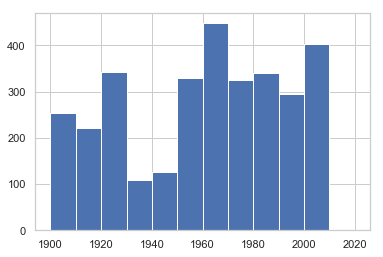

In [122]:
data['YearBuilt'].hist(bins=range(1900,2030,10))

# Sélection des variables explicatives et cibles :

Dans un premier temps nous allons essayer de prédire l'énergie consommée par le bâtiment (variable cible : 'SiteEnergyUse(kBtu)') à partir des variables explicatives (features) qui semblaient avoir le plus d'influence lors de l'EDA : la surface du bâtiment ('PropertyGFABuilding(s)') et son usage principal ('PrimaryPropertyType'). On ajoute également l'année de construction. Les données de localisation elles ne sont pas prises en compte car elles ne semblaient pas avoir d'influence sur la consommation.

In [123]:
features_list = ['PropertyGFABuilding(s)', 'PrimaryPropertyType', 'YearBuilt']
targets_list = ['SiteEnergyUse(kBtu)']

In [124]:
final_set = data.loc[:, features_list + targets_list]
final_set.drop_duplicates(subset=features_list, keep='first', inplace=True)

On sépare ensuite le nouveau dataset en un set d'entrainement et un set de test, en s'assurant que les différents usages primaires des bâtiments soient représentés dans les mêmes proportions dans les deux sets.

In [125]:
X_train, X_test, y_train, y_test = train_test_split(pd.get_dummies(final_set.loc[:,features_list]), 
                                                    final_set['SiteEnergyUse(kBtu)'],
                                                    test_size=0.3, random_state=42,
                                                    stratify=data.loc[list(final_set.index),
                                                                      ['PrimaryPropertyType']])
train_index = list(X_train.index)
test_index = list(X_test.index)

print('X_train shape : ' + str(X_train.shape))
print('X_test shape : ' + str(X_test.shape))

print('y_train shape : ' + str(y_train.shape))
print('y_test shape : ' + str(y_test.shape))

X_train shape : (1391, 34)
X_test shape : (597, 34)
y_train shape : (1391,)
y_test shape : (597,)


On obtient ainsi un set d'entrainement composé de 1391 individus et 34 variables. Le set de test contient lui 597 individus pour le même nombre de variables.

# Premières modélisations :

Dans cette partie on testera différents modèles et différents hyperparamètres pour ceux-ci afin de choisir le plus prometteur. Chaque test de modèle se décomposera de la manière suivante :

- La création du regresseur 
- Sélection des meilleurs hyperparamètres par cross validation à 4 folds via GridSearchCV en se basant sur le score R². Affichage des performances du meilleur modèle.
- Affichage des valeurs des trois métriques de performances selon les différents hyperparamètres
- Après sélection des meilleurs hyperparamètres, le modèle est entrainé sur tout le training set


In [126]:
global_results = pd.DataFrame(columns=['mean_test_R²','mean_test_mean_perc_error_score','mean_test_perc_error_tresh_score',
                                      'std_test_R²','std_test_mean_perc_error_score','std_test_perc_error_tresh_score'])

## Création de fonctions de scoring :

Dans un premier temps on créera différentes fonctions de scoring afin de choisir notre modèle

- la R² : utilisée pour minimiser l'erreur globale sur la valeur cible. A optimiser si par exemple on dispose d'un pool de bâtiment et que l'on souhaite prédire la consommation globale de l'ensemble.
- L'erreur moyenne en % : Utilisée pour minimiser l'erreur relative faite sur chacun des bâtiments. A optimiser si l'on souhaite prédire au mieux la consommation sur un bâtiment en particulier.
- Fraction de prédiction "bonne" : On peut choisir de définir une prédiciton comme bonne si son erreur est sous un seuil donné. A optimiser si l'on souhaite avoir un maximum de prédiction avec une faible erreur, quite à ce que les erreurs sur les valeurs non retenues comme bonnes devient plus importantes.

In [127]:
def f_mean_perc_error(y_true, y_pred):
    error = (y_true - y_pred) / y_true * 100
    error = abs(error).mean()
    return error
mean_perc_error_score = make_scorer(f_mean_perc_error, greater_is_better=False)   

In [128]:
def f_perc_error_tresh(y_true, y_pred):
    error = (y_true - y_pred) / y_true * 100
    error = len(error.loc[abs(error)<20]) / len(error) * 100
    return error
perc_error_tresh_score = make_scorer(f_perc_error_tresh, greater_is_better=True)

In [129]:
def RMSE(y_true, y_pred):
    error = np.sqrt(mean_squared_error(y_true, y_pred))
    return error
rmse_score = make_scorer(RMSE, greater_is_better=False) 

In [130]:
scoring = {'mean_perc_error_score': mean_perc_error_score, 'perc_error_tresh_score':perc_error_tresh_score,
           'R²': 'r2'}

## Approche naive :

Dans un premier temps on créera un modèle 'naif', qui prédit pour toutes les valeurs la moyenne de la consommation du set d'entrainement. Cela permettra d'avoir une baseline afin de quantifier l'apport d'un modèle plus complexe.

In [131]:
dum = dummy.DummyRegressor(strategy='median')
dum.fit(X_train, y_train)

DummyRegressor(constant=None, quantile=None, strategy='median')

In [132]:
r2 = r2_score(y_train, dum.predict(X_train))
print("R² train set : " + str(r2))

R² train set : -0.07915233442230862


In [133]:
mean_error_dum =f_mean_perc_error(y_train, dum.predict(X_train))
print("mean error train set :" + str(mean_error_dum))

mean error train set :165.15654444284556


In [134]:
error_tresh_dum = f_perc_error_tresh(y_train, dum.predict(X_train))
print("% error < 20% : " + str(error_tresh_dum))

% error < 20% : 14.090582314881381


## Regression Ridge :

En premier lieu il est intéressant d'essayer des modèles linéaires, qui sont rapides à entrainer et plus facilement interprétables. Ils permettront d'avoir un ordre d'idée des performances qu'il est possible d'avoir avec un modèle 'simple'. On utilisera des modèles avec régularisation afin de limiter l'overfitting sur les données d'entrainement et l'on testera différentes valeurs du coefficient 'alpha' qui détermine l'importance que l'on donne à cette régularisation. On teste dans un premier temps la régression Ridge, qui a pour particularité d'ajouter une contrainte sur la norme des coefficients du modèle linéaire afin que ceux ci soient le plus petit possible.

In [135]:
rdg = Ridge()
rdg_params = {'alpha': np.logspace(0, 3, 20)}
gs_rdg = GridSearchCV(rdg, rdg_params, cv=4, scoring=scoring,return_train_score=True, refit='R²')
gs_rdg.fit(X_train, y_train);

In [136]:
results_gs_rdg = pd.DataFrame.from_dict(gs_rdg.cv_results_)
global_results = global_results.append(
    results_gs_rdg.loc[results_gs_rdg['mean_test_R²']==gs_rdg.best_score_].loc[:,['mean_test_R²',
                                                                                  'mean_test_mean_perc_error_score',
                                                                                  'mean_test_perc_error_tresh_score',
                                                                                  'std_test_R²',
                                                                                  'std_test_mean_perc_error_score',
                                                                                  'std_test_perc_error_tresh_score']])
display(global_results)

,mean_test_R²,mean_test_mean_perc_error_score,mean_test_perc_error_tresh_score,std_test_R²,std_test_mean_perc_error_score,std_test_perc_error_tresh_score
0,0.59,-183.68,17.25,0.13,30.81,1.18


On obtient avec la régression Ridge un R² plutôt faible de 0.59 et une erreur moyenne de 183% élevée. On regarde ensuite de quelle manière le paramètre alpha influence les performances :

Text(0.5, 1.0, '% error < 20%')

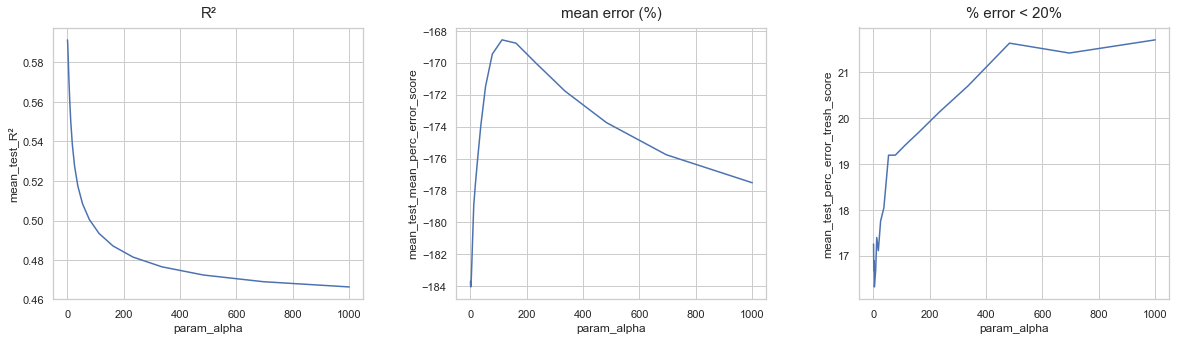

In [137]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=False, figsize=(20,5))
plt.subplots_adjust(wspace=0.3, hspace=0.3)
sns.lineplot(x='param_alpha', y='mean_test_R²', data=results_gs_rdg, ax=ax1)
ax1.set_title('R²', fontsize=15, pad=10)
sns.lineplot(x='param_alpha',y='mean_test_mean_perc_error_score', data=results_gs_rdg, ax=ax2)
ax2.set_title('mean error (%)', fontsize=15, pad=10)
sns.lineplot(x='param_alpha',y='mean_test_perc_error_tresh_score', data=results_gs_rdg, ax=ax3)
ax3.set_title('% error < 20%', fontsize=15, pad=10)

La régularisation tend à réduire le R² mais par contre contribue à améliorer l'erreur moyenne.

## Régression Lasso

On teste ensuite la régression Lasso, qui elle en plus de réduire au maximum les coefficients, peut aller jusqu'à les annuler.

In [138]:
lasso = Lasso(max_iter=10000)
lasso_params = {'alpha': np.logspace(0, 5, 50)}
gs_lasso = GridSearchCV(lasso, lasso_params, cv=4, return_train_score=True, scoring=scoring, refit='R²')
gs_lasso.fit(X_train, y_train);

In [139]:
results_gs_lasso = pd.DataFrame.from_dict(gs_lasso.cv_results_)
global_results = global_results.append(results_gs_lasso.loc[results_gs_lasso['mean_test_R²']==gs_lasso.best_score_].loc[:,['mean_test_R²',
                                                                                          'mean_test_mean_perc_error_score',
                                                                                          'mean_test_perc_error_tresh_score',
                                                                                        'std_test_R²',
                                                                                        'std_test_mean_perc_error_score',
                                                                                        'std_test_perc_error_tresh_score']])

display(global_results)

,mean_test_R²,mean_test_mean_perc_error_score,mean_test_perc_error_tresh_score,std_test_R²,std_test_mean_perc_error_score,std_test_perc_error_tresh_score
0,0.59,-183.68,17.25,0.13,30.81,1.18
41,0.59,-177.77,17.69,0.15,30.46,0.60


Les résultats sont très similaires à la régression Ridge, avec une légère amélioration des performances sur l'erreur moyenne.

Text(0.5, 1.0, '% error < 20%')

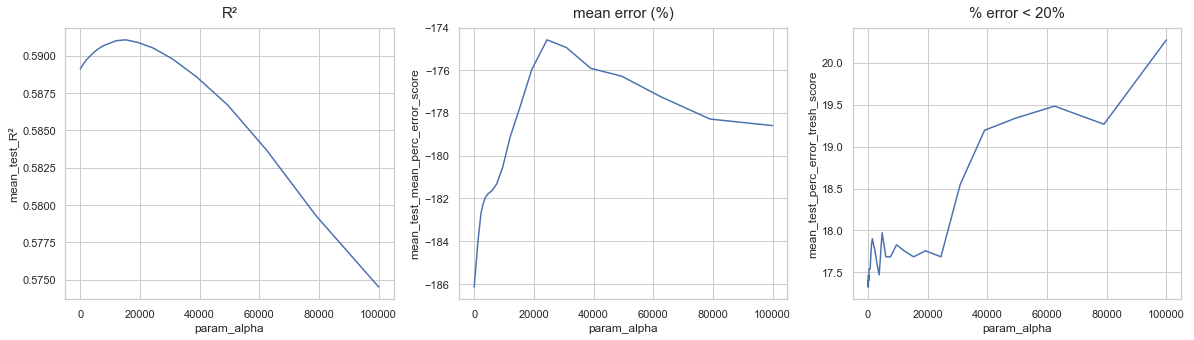

In [140]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=False, figsize=(20,5))
sns.lineplot(x='param_alpha', y='mean_test_R²', data=results_gs_lasso, ax=ax1)
ax1.set_title('R²', fontsize=15, pad=10)
sns.lineplot(x='param_alpha',y='mean_test_mean_perc_error_score', data=results_gs_lasso, ax=ax2)
ax2.set_title('mean error (%)', fontsize=15, pad=10)
sns.lineplot(x='param_alpha',y='mean_test_perc_error_tresh_score', data=results_gs_lasso, ax=ax3)
ax3.set_title('% error < 20%', fontsize=15, pad=10)

Cette fois ci la régularisation améliore tous les métriques de performances.

## Elastic Net

Dernier modèle linéaire à essayer, l'Elastic Net combine à la fois la regression Ridge et Lasso. Le niveau de contribution de chacun des deux modèles est géré par le paramètre 'l1_ratio' que l'on fera varier. Le paramètre alpha lui joue le même rôle que précédemment.

In [141]:
enet = ElasticNet()
enet_params = {'alpha': np.logspace(-1, 2, 20), 'l1_ratio': np.arange(0.2,0.8,0.2)}
gs_enet = GridSearchCV(enet, enet_params, cv=4, return_train_score=True, scoring=scoring, refit='R²')
gs_enet.fit(X_train, y_train);

### Influence des hyperparamètres :

In [142]:
results_gs_enet = pd.DataFrame.from_dict(gs_enet.cv_results_)

In [143]:
results_enet_vis = results_gs_enet.loc[:,['param_alpha', 'param_l1_ratio','mean_test_R²','mean_test_mean_perc_error_score',
                                         'mean_test_perc_error_tresh_score']]
global_results = global_results.append(
    results_gs_enet.loc[results_gs_enet['mean_test_R²']==gs_enet.best_score_].loc[:,['mean_test_R²',
                                                                                     'mean_test_mean_perc_error_score',
                                                                                     'mean_test_perc_error_tresh_score',
                                                                                     'std_test_R²',
                                                                                     'std_test_mean_perc_error_score',
                                                                                     'std_test_perc_error_tresh_score']])

display(global_results)
results_enet_vis = results_enet_vis.pivot(index='param_alpha', columns='param_l1_ratio', values=['mean_test_R²','mean_test_mean_perc_error_score',
                                         'mean_test_perc_error_tresh_score'])

,mean_test_R²,mean_test_mean_perc_error_score,mean_test_perc_error_tresh_score,std_test_R²,std_test_mean_perc_error_score,std_test_perc_error_tresh_score
0,0.59,-183.68,17.25,0.13,30.81,1.18
41,0.59,-177.77,17.69,0.15,30.46,0.60
3,0.53,-177.10,17.47,0.07,31.42,1.32


Avec ce modèle, on note un r² qui diminue, la performance est moins bonne que la régression Lasso.

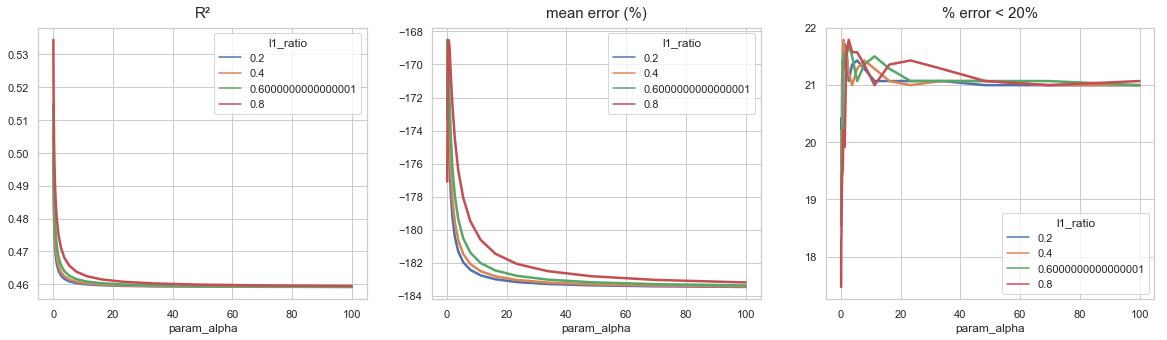

In [144]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=False, figsize=(20,5))
sns.lineplot(data=results_enet_vis.loc[:,'mean_test_R²'], linewidth=2.5, dashes=False, ax=ax1)
ax1.set_title('R²', fontsize=15, pad=10)
ax1.get_legend().set_title('l1_ratio')
sns.lineplot(data=results_enet_vis.loc[:,'mean_test_mean_perc_error_score'], linewidth=2.5, dashes=False, ax=ax2)
ax2.set_title('mean error (%)', fontsize=15, pad=10)
ax2.get_legend().set_title('l1_ratio')
sns.lineplot(data=results_enet_vis.loc[:,'mean_test_perc_error_tresh_score'], linewidth=2.5, dashes=False, ax=ax3)
ax3.set_title('% error < 20%', fontsize=15, pad=10)
ax3.get_legend().set_title('l1_ratio')

Les différents hyperparamètres ne semble pas avoir une forte influence sur la performance.

## Random Forest Regression

Après les modèles linéaires, il est possible de passer sur des modèles ensemblistes, qui vont combiner une multitudes de modèles 'faibles'. On essaiera dans un premier temps un algorithme Random Forest, qui combine plusieurs modèles d'arbres de décisions.  
Un arbre de décision est un modèle qui va séparer le dataset de manière successive en des sous groupes de plus en plus petits, en utilisant une variable explicative comme critère de sépration à chaque étape.  
Dans notre cas par exemple on pourrait imaginer dans un premier temps que l'on sépare le dataset en deux : les batiments qui sont un hopital et les autres. On pourrait ensuite pour le premier groupe effectuer une séparation entre les batiments construits avant 1980 et les autres, pendant que le second groupe est lui subdivisé selon un critère d'usage une nouvelle fois. L'arbre poursuit ainsi son expansion jusqu'à ce qu'un critère d'arrêt défini soit atteint. On peut ainsi contrôler la profondeur maximale de l'arbre (le nombre d'étapes de séparation) ou bien encore le nombre d'échantillons minimal pour composer un sous groupe. On testera ici différentes valeurs pour ces deux paramètres.  
La Random Forest va ainsi entrainer de nombreux arbres, et utilisera tous ces arbres pour effectuer une prédiction sur une nouvelle valeur en moyennant les résultats obtenus sur l'ensemble.

In [145]:
rf_reg = RandomForestRegressor(n_estimators=300, random_state=42)
rf_reg_params = {'min_samples_split': range(2, 32, 5), 'max_depth': np.arange(1, 25, 5)}
gs_rf_reg = GridSearchCV(rf_reg, rf_reg_params, cv=4, return_train_score=True, scoring=scoring, refit='R²')
gs_rf_reg.fit(X_train, y_train);

In [146]:
results_gs_rf_reg = pd.DataFrame.from_dict(gs_rf_reg.cv_results_)

In [147]:
results_gs_rf_reg_vis = results_gs_rf_reg.loc[:,['param_min_samples_split', 'param_max_depth',
                                                 'mean_test_R²','mean_test_mean_perc_error_score',
                                                 'mean_test_perc_error_tresh_score']]

global_results = global_results.append(
    results_gs_rf_reg.loc[results_gs_rf_reg['mean_test_R²']==gs_rf_reg.best_score_].loc[:,['mean_test_R²',
                                                                                           'mean_test_mean_perc_error_score',
                                                                                           'mean_test_perc_error_tresh_score',
                                                                                            'std_test_R²',
                                                                                            'std_test_mean_perc_error_score',
                                                                                            'std_test_perc_error_tresh_score']])

display(global_results)
results_gs_rf_reg_vis = results_gs_rf_reg_vis.pivot(index='param_min_samples_split', columns='param_max_depth', 
                                                    values=['mean_test_R²','mean_test_mean_perc_error_score',
                                                            'mean_test_perc_error_tresh_score'])

,mean_test_R²,mean_test_mean_perc_error_score,mean_test_perc_error_tresh_score,std_test_R²,std_test_mean_perc_error_score,std_test_perc_error_tresh_score
0,0.59,-183.68,17.25,0.13,30.81,1.18
41,0.59,-177.77,17.69,0.15,30.46,0.60
3,0.53,-177.10,17.47,0.07,31.42,1.32
6,0.69,-166.53,22.93,0.06,30.03,0.98


On constate un gain de performance significatif sur le R², néanmoins l'erreur relative moyenne reste importante (même si plus faible).

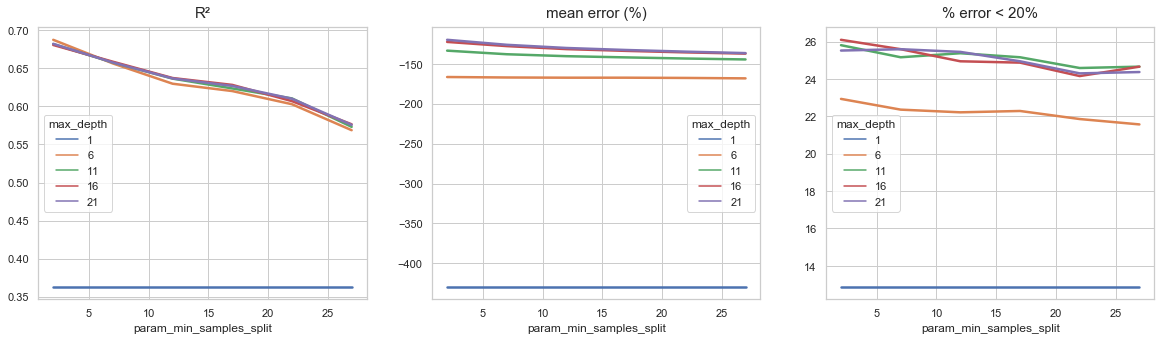

In [148]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=False, figsize=(20,5))
sns.lineplot(data=results_gs_rf_reg_vis.loc[:,'mean_test_R²'], linewidth=2.5, dashes=False, ax=ax1)
ax1.set_title('R²', fontsize=15, pad=10)
ax1.get_legend().set_title('max_depth')
sns.lineplot(data=results_gs_rf_reg_vis.loc[:,'mean_test_mean_perc_error_score'], linewidth=2.5, dashes=False, ax=ax2)
ax2.set_title('mean error (%)', fontsize=15, pad=10)
ax2.get_legend().set_title('max_depth')
sns.lineplot(data=results_gs_rf_reg_vis.loc[:,'mean_test_perc_error_tresh_score'], linewidth=2.5, dashes=False, ax=ax3)
ax3.set_title('% error < 20%', fontsize=15, pad=10)
ax3.get_legend().set_title('max_depth')

Du côté des hyperparamètres, on note que la profondeur des arbres n'a pas besoin d'être très importante, une dizaine d'étapes donnant déjà les performances maximales. Le nombre minimal d'échantillons pour effectuer la séparation d'un noeud tend à faire décroître le R², ce qui semble normal car l'on obtiendra des groupements moins spécifiques.

In [149]:
# f, ax = plt.subplots(figsize=(5,20))
# sns.set(style="whitegrid")
# features_importance = pd.DataFrame({'feature': X_train.columns.values, 'importance': gs_rf_reg.best_estimator_ .feature_importances_})
# sns.barplot(x='importance', y='feature', data=features_importance , color="b",ax=ax)

## Gradient Boosting :

Dans la continuité des méthodes ensemblistes, on testera ci dessous le 'Gradient Boosting'. Le principe reste le même, entrainer un grand nombre d'apprenant faibles et les combiner, néanmoins cette fois ci les modèles sont entrainés de manière successive, chacun s'efforcant de corriger les erreurs effectués par le précédent modèle. Cela se fait en attribuant un poids à chaque observation et à augmenter celui ci si le modèle génère une erreur importante sur cette observation. Le modèle suivant accordera ainsi plus d'importance à cette observation en particulier.  
Pour ce cas de figure on jouera sur le type de fonction de perte à optimiser, certaines comme la ‘lad’ (least absolute deviation) et 'Huber' étant moins sensibles aux outliers. On testera également différentes profondeurs d'arbre de décision, qui est le modèle de base utilisé.

In [150]:
gboost = GradientBoostingRegressor(n_estimators=300, learning_rate=0.1, random_state=42)

In [151]:
gboost_params = {'loss': ['ls', 'lad', 'huber'], 'max_depth': np.arange(1, 25, 5)}
gs_gboost = GridSearchCV(gboost, gboost_params, cv=4, return_train_score=True, scoring=scoring, refit='R²')
gs_gboost.fit(X_train, y_train);

In [152]:
results_gs_gboost = pd.DataFrame.from_dict(gs_gboost.cv_results_)
results_gs_gboost_vis = results_gs_gboost.loc[:,['param_max_depth', 'param_loss',
                                                 'mean_test_R²','mean_test_mean_perc_error_score',
                                                 'mean_test_perc_error_tresh_score']]

global_results = global_results.append(
    results_gs_gboost.loc[results_gs_gboost['mean_test_R²']==gs_gboost.best_score_].loc[:,['mean_test_R²',
                                                                                          'mean_test_mean_perc_error_score',
                                                                                          'mean_test_perc_error_tresh_score',
                                                                                          'std_test_R²',
                                                                                          'std_test_mean_perc_error_score',
                                                                                          'std_test_perc_error_tresh_score']])

display(global_results)
results_gs_gboost_vis = results_gs_gboost_vis.pivot(index='param_max_depth', columns='param_loss', 
                                                    values=['mean_test_R²','mean_test_mean_perc_error_score',
                                                            'mean_test_perc_error_tresh_score'])

,mean_test_R²,mean_test_mean_perc_error_score,mean_test_perc_error_tresh_score,std_test_R²,std_test_mean_perc_error_score,std_test_perc_error_tresh_score
0,0.59,-183.68,17.25,0.13,30.81,1.18
41,0.59,-177.77,17.69,0.15,30.46,0.60
3,0.53,-177.10,17.47,0.07,31.42,1.32
6,0.69,-166.53,22.93,0.06,30.03,0.98
1,0.64,-125.89,25.52,0.12,37.69,1.85


En termes de performances, le R² est plus faible que pour la Random Forest, néanmoins l'erreur moyenne est également réduite. Le gradient boosting est donc meilleur pour réduire la prédiction d'un bâtiment en particulier. A noter cependant que ce modèle présente également une plus grande variabilité sur les différents folds de test que la Random Forest.

Text(0.5, 1.0, '% error < 20%')

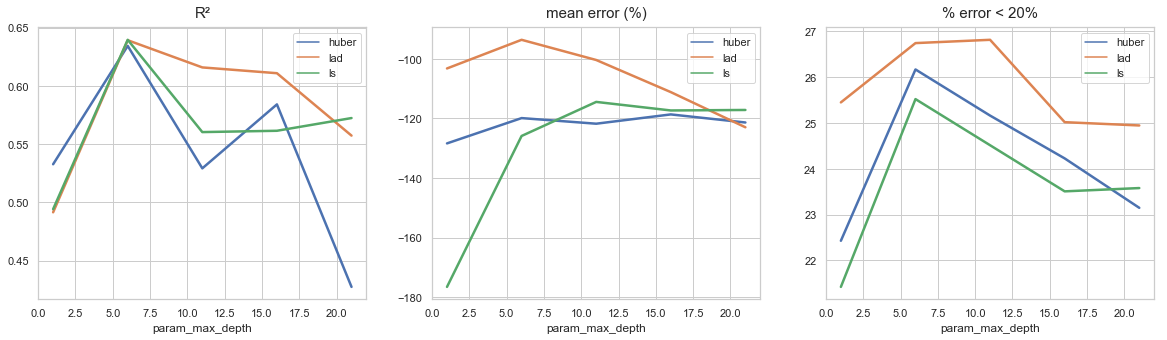

In [153]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=False, figsize=(20,5))
sns.lineplot(data=results_gs_gboost_vis.loc[:,'mean_test_R²'], linewidth=2.5, dashes=False, ax=ax1)
ax1.set_title('R²', fontsize=15, pad=10)
sns.lineplot(data=results_gs_gboost_vis.loc[:,'mean_test_mean_perc_error_score'], linewidth=2.5, dashes=False, ax=ax2)
ax2.set_title('mean error (%)', fontsize=15, pad=10)
sns.lineplot(data=results_gs_gboost_vis.loc[:,'mean_test_perc_error_tresh_score'], linewidth=2.5, dashes=False, ax=ax3)
ax3.set_title('% error < 20%', fontsize=15, pad=10)

Au niveau des hyperparamètres, on note qu'il est plus intéressant d'entrainer des arbres court (environ 5 étapes). Pour ce qui est des fonctions de pertes, 'ls' (least square) et huber donne les meilleurs performances en terme de R², néanmoins la fonction 'lad' elle donne de bien meilleures performances en terme d'erreur relative moyenne. Celle ci serait donc un choix plus intéressant si l'on se focalise sur la prédiction au niveau du bâtiment et non pas d'un ensemble de bâtiments.

In [154]:
display(global_results)

,mean_test_R²,mean_test_mean_perc_error_score,mean_test_perc_error_tresh_score,std_test_R²,std_test_mean_perc_error_score,std_test_perc_error_tresh_score
0,0.59,-183.68,17.25,0.13,30.81,1.18
41,0.59,-177.77,17.69,0.15,30.46,0.60
3,0.53,-177.10,17.47,0.07,31.42,1.32
6,0.69,-166.53,22.93,0.06,30.03,0.98
1,0.64,-125.89,25.52,0.12,37.69,1.85


In [155]:
# f, ax = plt.subplots(figsize=(5,20))
# sns.set(style="whitegrid")
# features_importance = pd.DataFrame({'feature': X_train.columns.values, 'importance': gs_gboost.best_estimator_ .feature_importances_})
# sns.barplot(x='importance', y='feature', data=features_importance , color="b",ax=ax)

## Bagging regressor

Une autre approche pour les méthode ensembliste est d'utiliser le 'Bagging'. Le coeur du fonctionnement reste le même que pour la random forest. La différence vient que cette fois ci préalablement à l'entrainement de l'un des apprenants faibles l'on va créer un nouveau set de données issus de manière aléatoire du dataset original.  
Dans ce cas, on pourra régler deux paramètres : la fraction de features à utiliser par rapport à celle du dataset orignal pour créer le nouveau et la fraction d'échantillons.

In [156]:
bag_rf_params = {'max_samples': np.arange(0.1, 1, 0.1), 'max_features': np.arange(0.2, 1, 0.2)}
gs_bag_rf = GridSearchCV(BaggingRegressor(base_estimator=None, n_estimators=300,random_state=42), 
                         bag_rf_params, cv=4, return_train_score=True, scoring=scoring, refit='R²')
gs_bag_rf.fit(X_train, y_train);

### Influence des hyperparamètres :

In [157]:
results_gs_bag_rf = pd.DataFrame.from_dict(gs_bag_rf.cv_results_)
results_gs_bag_rf_vis = results_gs_bag_rf.loc[:,['param_max_features', 'param_max_samples',
                                                 'mean_test_R²','mean_test_mean_perc_error_score',
                                                 'mean_test_perc_error_tresh_score']]

global_results = global_results.append(results_gs_bag_rf.loc[results_gs_bag_rf['mean_test_R²']==gs_bag_rf.best_score_].loc[:,['mean_test_R²',
                                                                                          'mean_test_mean_perc_error_score',
                                                                                          'mean_test_perc_error_tresh_score',
                                                                                        'std_test_R²',
                                                                                        'std_test_mean_perc_error_score',
                                                                                        'std_test_perc_error_tresh_score']])

display(global_results)
results_gs_bag_rf_vis = results_gs_bag_rf_vis.pivot(index='param_max_samples', columns='param_max_features', 
                                                    values=['mean_test_R²','mean_test_mean_perc_error_score',
                                                            'mean_test_perc_error_tresh_score'])

,mean_test_R²,mean_test_mean_perc_error_score,mean_test_perc_error_tresh_score,std_test_R²,std_test_mean_perc_error_score,std_test_perc_error_tresh_score
0,0.59,-183.68,17.25,0.13,30.81,1.18
41,0.59,-177.77,17.69,0.15,30.46,0.60
3,0.53,-177.10,17.47,0.07,31.42,1.32
6,0.69,-166.53,22.93,0.06,30.03,0.98
1,0.64,-125.89,25.52,0.12,37.69,1.85
35,0.63,-162.27,21.64,0.03,22.31,2.09


Ce modèle performe moins bien que les deux autres méthodes ensemblistes, avec un R² plus faible que celui du Gradient Boosting et une erreur relative moyenne similaire à celle de la Random Forest.

Text(0.5, 1.0, '% error < 20%')

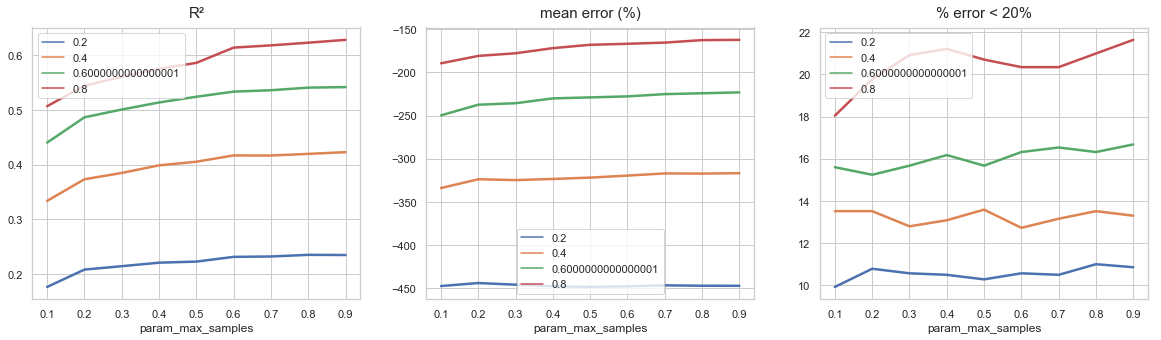

In [158]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=False, figsize=(20,5))
sns.lineplot(data=results_gs_bag_rf_vis.loc[:,'mean_test_R²'], linewidth=2.5, dashes=False, ax=ax1)
ax1.set_title('R²', fontsize=15, pad=10)
sns.lineplot(data=results_gs_bag_rf_vis.loc[:,'mean_test_mean_perc_error_score'], linewidth=2.5, dashes=False, ax=ax2)
ax2.set_title('mean error (%)', fontsize=15, pad=10)
sns.lineplot(data=results_gs_bag_rf_vis.loc[:,'mean_test_perc_error_tresh_score'], linewidth=2.5, dashes=False, ax=ax3)
ax3.set_title('% error < 20%', fontsize=15, pad=10)

Au niveau des hyperparamètres, on voit qu'il est important de prendre un maximum de features disponibles. Il est possible sinon que certaines features très discriminantes soient parfois laissées de côté, entrainant une forte chute des performances. La fraction d'échantillons d'échantillons retenus du dataset original elle a une influence moins flagrante, mais permet néanmoins d'améliorer les performances si celle ci est plus importante.

## XGBOOST :

On teste également une autre implémentation du gradient boosting, XGBoost :

In [159]:
xgb_model = xgb.XGBRegressor(objective ='reg:squarederror', learning_rate = 0.1,random_state=42)

xgb_params = {'max_depth': np.arange(1, 5, 1), 'alpha': np.logspace(1,5,1) , 'n_estimators': range(100,500,100), 
              'colsample_bytree': np.arange(0.1,0.5,0.1)}

gs_xgb = GridSearchCV(xgb_model, xgb_params, 
                         cv=4, return_train_score=True, scoring=scoring, refit='R²')

gs_xgb.fit(X_train, y_train)

GridSearchCV(cv=4, error_score='raise-deprecating',
       estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:squarederror',
       random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=None, subsample=1, verbosity=1),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': array([1, 2, 3, 4]), 'alpha': array([10.]), 'n_estimators': range(100, 500, 100), 'colsample_bytree': array([0.1, 0.2, 0.3, 0.4])},
       pre_dispatch='2*n_jobs', refit='R²', return_train_score=True,
       scoring={'mean_perc_error_score': make_scorer(f_mean_perc_error, greater_is_better=False), 'perc_error_tresh_score': make_scorer(f_perc_error_tresh), 'R²': 'r2'},
       verbose=0)

In [160]:
results_gs_xgb = pd.DataFrame.from_dict(gs_xgb.cv_results_)
results_gs_xgb_vis = results_gs_xgb.loc[:,['param_n_estimators', 'param_max_depth',
                                           'param_alpha', 'param_colsample_bytree',
                                                 'mean_test_R²','mean_test_mean_perc_error_score',
                                                 'mean_test_perc_error_tresh_score']]

global_results = global_results.append(
    results_gs_xgb.loc[results_gs_xgb['mean_test_R²']==gs_xgb.best_score_].loc[:,['mean_test_R²',
                                                                                  'mean_test_mean_perc_error_score',
                                                                                  'mean_test_perc_error_tresh_score',
                                                                                  'std_test_R²',
                                                                                  'std_test_mean_perc_error_score',
                                                                                  'std_test_perc_error_tresh_score']])
display(global_results)

,mean_test_R²,mean_test_mean_perc_error_score,mean_test_perc_error_tresh_score,std_test_R²,std_test_mean_perc_error_score,std_test_perc_error_tresh_score
0,0.59,-183.68,17.25,0.13,30.81,1.18
41,0.59,-177.77,17.69,0.15,30.46,0.60
3,0.53,-177.10,17.47,0.07,31.42,1.32
6,0.69,-166.53,22.93,0.06,30.03,0.98
1,0.64,-125.89,25.52,0.12,37.69,1.85
35,0.63,-162.27,21.64,0.03,22.31,2.09
53,0.71,-152.16,18.04,0.09,34.16,1.55


XGBoost obtient un R² similaire à la Random Forest, avec une erreur relative moyenne un peu plus faible (152% au lieu de 166%). Néanmoins cette dernière reste plus élevée que pour l'implémentation du Gradient Boosting de Sklearn, qui a elle une erreur relative moyenne de 125%.

## Résultats :

Ci dessous le tableau récapitulatif et une visualisation des résultats obtenus avec les différents modèles :

In [161]:
global_results.columns=['mean_R²','mean_%_mean_error','mean_%_tresh_error','std_R²','std_%_mean_error','std_%_tresh_error']
global_results.insert(loc=0, column='model', value=['Ridge', 'Lasso','E_net','Random_Forest','G_boost','Bagging','XGBoost'])
global_results['mean_%_mean_error'] = -1 * global_results['mean_%_mean_error']
display(global_results)

,model,mean_R²,mean_%_mean_error,mean_%_tresh_error,std_R²,std_%_mean_error,std_%_tresh_error
0,Ridge,0.59,183.68,17.25,0.13,30.81,1.18
41,Lasso,0.59,177.77,17.69,0.15,30.46,0.60
3,E_net,0.53,177.10,17.47,0.07,31.42,1.32
6,Random_Forest,0.69,166.53,22.93,0.06,30.03,0.98
1,G_boost,0.64,125.89,25.52,0.12,37.69,1.85
35,Bagging,0.63,162.27,21.64,0.03,22.31,2.09
53,XGBoost,0.71,152.16,18.04,0.09,34.16,1.55


Text(0, 0.5, '')

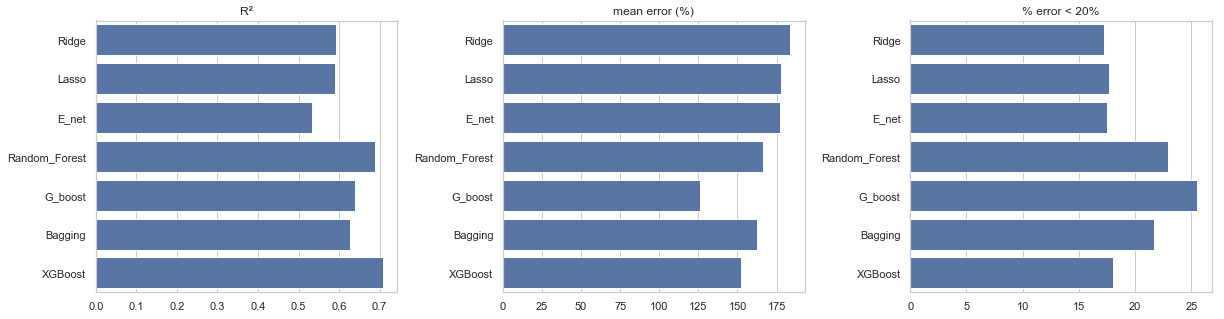

In [162]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=False, figsize=(20,5))
sns.set(style="whitegrid")
plt.subplots_adjust(wspace=0.35, hspace=0.3)
sns.barplot(x='mean_R²', y='model', data=global_results, color="b", ax=ax1)
ax1.set_title('R²')
ax1.set_xlabel('')
ax1.set_ylabel('')
sns.barplot(x='mean_%_mean_error', y='model', data=global_results, color="b", ax=ax2)
ax2.set_title('mean error (%)')
ax2.set_xlabel('')
ax2.set_ylabel('')
sns.barplot(x='mean_%_tresh_error', y='model', data=global_results, color="b", ax=ax3)
ax3.set_title('% error < 20%')
ax3.set_xlabel('')
ax3.set_ylabel('')

A ce stade, les méthodes ensemblistes donnent les meilleurs résultats, notamment le Gradient Boosting, sous sa forme classique ou bien l'implémentation XGBoost. Le premier étant plus intéressant d'un point de vue prédiction au niveau du bâtiment, l'autre au niveau de la prédiction de la consommation totale d'un ensemble de bâtiments. La Random Forest dispose également de résultats parmi les meilleurs, avec un R² très proche de celui de XGBoost.  
Afin de comprendre un peu plus les différences entre les résultats des méthodes ensemblistes et les modèles linéaires, on compare ci dessous les prédictions faites par un modèle de chaque type (Lasso et Gradient Boosting) en fonction de la valeur à prédire, ainsi que l'erreur relative en fonction de cette dernière.

In [163]:
results_gs_gboost_opti = functions.results_train(dataset, gs_gboost, train_index, gs_gboost.predict(X_train), y_train)
results_lasso_opti = functions.results_train(dataset, gs_rdg, train_index, gs_lasso.predict(X_train), y_train)

In [164]:
functions.show_perf(results_gs_gboost_opti)
functions.show_perf(results_lasso_opti)

Loading BokehJS ...

Loading BokehJS ...

On constate que le modèle ensembliste réduit l'erreur que ce soit pour les petites et grandes valeurs. Cela est particulièrement vrai pour les faibles valeurs de consommation, où l'erreur maximale n'est plus que de 9000% au lieu de 25000%. On note également que le modèle ensembliste réduit également les prédictions négatives.

# Essais d'optimisation :

Afin d'essayer d'optimiser un peu plus les performances, nous allons appliquer quelques transformations aux données ou bien en ajouter.  
  
Dans un premier temps, on transformera la variable explicative de surface et celle cible de la consommation en utilisant le log. En effet lors de l'EDA, il a été constaté une distribution de ces variables très écrasée vers les petites valeurs, à cause de valeurs très importantes. Cela permettra d'obtenir pour ces deux variables un distribution normale et également pour la variable de surface la ramener à un ordre de grandeur plus compatible avec les autres variables explicatives.  
  
Dans un second temps on ajoutera les usages secondaires et tertiaires des bâtiments et leurs surfaces associées, afin de fournir un maximum d'informations au modèle. La transformation appliquée aux données pour cette étape sera décrite dans la partie concernée.  
  
Pour chacune des transformations, on testera à nouveau 3 des méthodes qui ont été efficaces précédemment et ont des fonctionnements différents : La régression Lasso, La Random Forest et le Gradient Boosting. Ces trois modèles ont été choisis car ils obtenaient les meilleures performances sur l'un ou l'autre des critères parmi leur classe d'algorithme.

## Passage au log pour la surface et l'énergie consommée :

Avec le passage au log pour la surface et l'énergie consommée, il faut définir de nouvelles fonctions d'évaluation des performances qui prennent en compte cette modification. En effet les prédictions seront maintenant faites en valeur logarithmique, il faut donc les repasser par la fonction exponentielle pour avoir des métriques comparables avec la première partie et pouvoir quantifier l'apport de cette modification.

In [165]:
def f_mean_perc_error_log(y_true, y_pred):
    error = (np.exp(y_true) - np.exp(y_pred)) / np.exp(y_true) * 100
    error = abs(error).mean()
    return error
mean_perc_error_score_log = make_scorer(f_mean_perc_error_log, greater_is_better=False)   

In [166]:
def f_perc_error_tresh_log(y_true, y_pred):
    error = (np.exp(y_true) - np.exp(y_pred)) / np.exp(y_true) * 100
    error = len(error.loc[abs(error)<20]) / len(error) * 100
    return error
perc_error_tresh_score_log = make_scorer(f_perc_error_tresh_log, greater_is_better=True)

In [167]:
def R2_log(y_true, y_pred):
    error = r2_score(np.exp(y_true), np.exp(y_pred))
    return error
R2_score_log = make_scorer(R2_log, greater_is_better=True)

In [168]:
scoring_log = {'mean_perc_error_score': mean_perc_error_score_log, 'perc_error_tresh_score':perc_error_tresh_score_log,
           'R²': R2_score_log}

On créé ensuite des nouvelles variables X_train_log, X_test_log, y_train_log et y_test_log qui prennent en compte la transformation.

In [169]:
X_train_log = X_train.copy() 
X_test_log = X_test.copy() 
X_train_log['PropertyGFABuilding(s)'] = np.log(X_train_log['PropertyGFABuilding(s)'] + 0.001)
X_test_log['PropertyGFABuilding(s)'] = np.log(X_test_log['PropertyGFABuilding(s)'] + 0.001)
y_train_log = np.log(y_train + 0.001)
y_test_log = np.log(y_test + 0.001)

Text(0.5, 0, '')

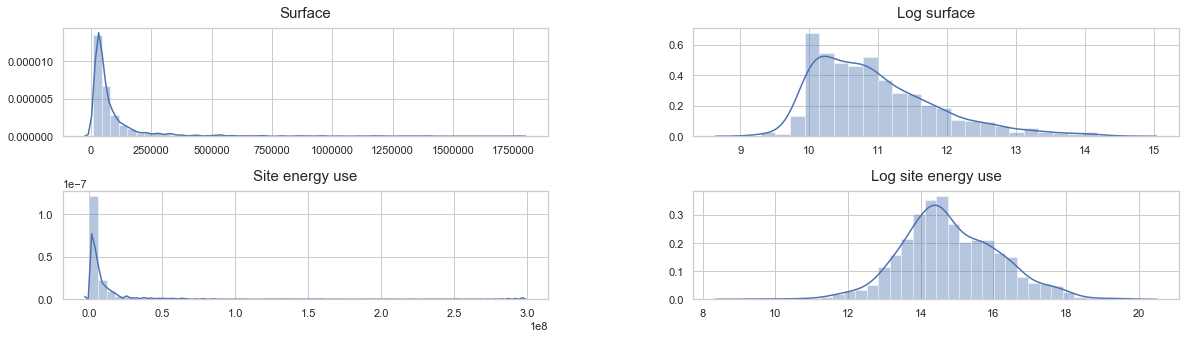

In [170]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharey=False, figsize=(20,5))
plt.subplots_adjust(wspace=0.3, hspace=0.5)
sns.distplot(X_train['PropertyGFABuilding(s)'], ax=ax1)
ax1.set_title('Surface', fontsize=15, pad=10)
ax1.set_xlabel('')
sns.distplot(X_train_log['PropertyGFABuilding(s)'], ax=ax2)
ax2.set_title('Log surface', fontsize=15, pad=10)
ax2.set_xlabel('')
sns.distplot(y_train, ax=ax3)
ax3.set_title('Site energy use', fontsize=15, pad=10)
ax3.set_xlabel('')
sns.distplot(y_train_log, ax=ax4)
ax4.set_title('Log site energy use', fontsize=15, pad=10)
ax4.set_xlabel('')

In [171]:
global_results_log = pd.DataFrame(columns=['mean_test_R²','mean_test_mean_perc_error_score','mean_test_perc_error_tresh_score',
                                      'std_test_R²','std_test_mean_perc_error_score','std_test_perc_error_tresh_score'])

### Régression Lasso

In [172]:
lasso = Lasso(max_iter=10000)
lasso_params = {'alpha': np.logspace(-3, 1, 20)}
gs_lasso_log = GridSearchCV(lasso, lasso_params, cv=4, return_train_score=True, scoring=scoring_log, refit='R²')
gs_lasso_log.fit(X_train_log, y_train_log);

In [173]:
results_gs_lasso = pd.DataFrame.from_dict(gs_lasso_log.cv_results_)
global_results_log = global_results_log.append(results_gs_lasso.loc[results_gs_lasso['mean_test_R²']==gs_lasso_log.best_score_].loc[:,['mean_test_R²',
                                                                                          'mean_test_mean_perc_error_score',
                                                                                          'mean_test_perc_error_tresh_score',
                                                                                        'std_test_R²',
                                                                                        'std_test_mean_perc_error_score',
                                                                                        'std_test_perc_error_tresh_score']])

display(global_results_log)

,mean_test_R²,mean_test_mean_perc_error_score,mean_test_perc_error_tresh_score,std_test_R²,std_test_mean_perc_error_score,std_test_perc_error_tresh_score
0,0.66,-90.52,27.10,0.08,20.82,0.62


En termes de performances on note une nette amélioration du R², qui passe de 0.59 à 0.66. Même constat pour l'erreur relative moyenne qui est réduite à 90% au lieu de 178%.

Text(0.5, 1.0, '% error < 20%')

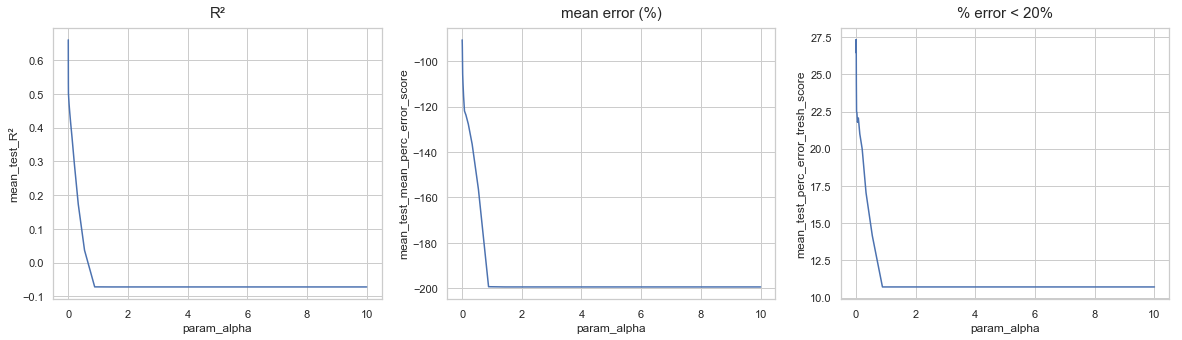

In [174]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=False, figsize=(20,5))
sns.lineplot(x='param_alpha', y='mean_test_R²', data=results_gs_lasso, ax=ax1)
ax1.set_title('R²', fontsize=15, pad=10)
sns.lineplot(x='param_alpha',y='mean_test_mean_perc_error_score', data=results_gs_lasso, ax=ax2)
ax2.set_title('mean error (%)', fontsize=15, pad=10)
sns.lineplot(x='param_alpha',y='mean_test_perc_error_tresh_score', data=results_gs_lasso, ax=ax3)
ax3.set_title('% error < 20%', fontsize=15, pad=10)

Cette fois ci la régularisation a une très forte propension à dégrader les performances.

### Gradient Boosting :

In [175]:
gboost = GradientBoostingRegressor(n_estimators=300, learning_rate=0.1, random_state=42)

In [176]:
gboost_params = {'loss': ['ls', 'lad', 'huber'], 'max_depth': np.arange(1, 25, 5)}
gs_gboost_log = GridSearchCV(gboost, gboost_params, cv=4, return_train_score=True, scoring=scoring_log, refit='R²')
gs_gboost_log.fit(X_train_log, y_train_log);

In [177]:
results_gs_gboost = pd.DataFrame.from_dict(gs_gboost_log.cv_results_)
results_gs_gboost_vis = results_gs_gboost.loc[:,['param_max_depth', 'param_loss',
                                                 'mean_test_R²','mean_test_mean_perc_error_score',
                                                 'mean_test_perc_error_tresh_score']]

global_results_log = global_results_log.append(
    results_gs_gboost.loc[results_gs_gboost['mean_test_R²']==gs_gboost_log.best_score_].loc[:,['mean_test_R²',
                                                                                               'mean_test_mean_perc_error_score',
                                                                                               'mean_test_perc_error_tresh_score',
                                                                                                'std_test_R²',
                                                                                                'std_test_mean_perc_error_score',
                                                                                                'std_test_perc_error_tresh_score']])

display(global_results_log)
results_gs_gboost_vis = results_gs_gboost_vis.pivot(index='param_max_depth', columns='param_loss', 
                                                    values=['mean_test_R²','mean_test_mean_perc_error_score',
                                                            'mean_test_perc_error_tresh_score'])

,mean_test_R²,mean_test_mean_perc_error_score,mean_test_perc_error_tresh_score,std_test_R²,std_test_mean_perc_error_score,std_test_perc_error_tresh_score
0,0.66,-90.52,27.10,0.08,20.82,0.62
1,0.70,-96.61,25.81,0.11,15.22,1.74


Pour le Gradient boosting, même constat que précédement, le R² passant de 0.63 à 0.69 et l'erreur relative moyenne de 125% à 98%. A noter également que la variabilité est plus faible avec cette transformation.

Text(0.5, 1.0, '% error < 20%')

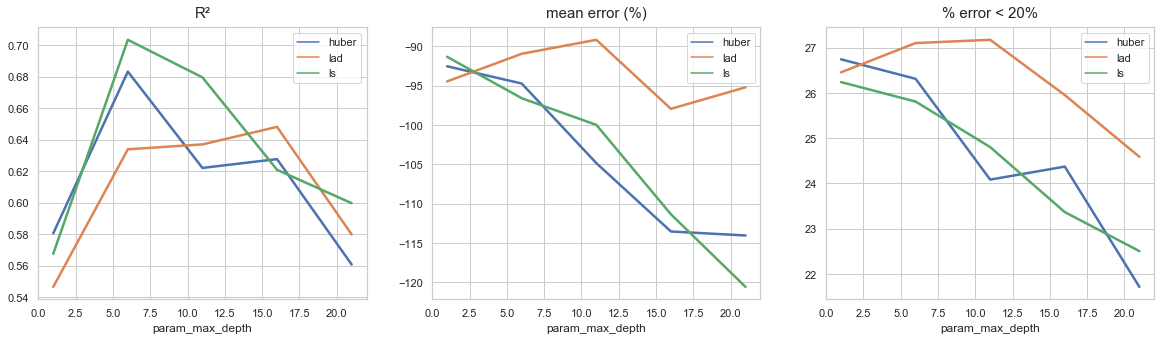

In [178]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=False, figsize=(20,5))
sns.lineplot(data=results_gs_gboost_vis.loc[:,'mean_test_R²'], linewidth=2.5, dashes=False, ax=ax1)
ax1.set_title('R²', fontsize=15, pad=10)
sns.lineplot(data=results_gs_gboost_vis.loc[:,'mean_test_mean_perc_error_score'], linewidth=2.5, dashes=False, ax=ax2)
ax2.set_title('mean error (%)', fontsize=15, pad=10)
sns.lineplot(data=results_gs_gboost_vis.loc[:,'mean_test_perc_error_tresh_score'], linewidth=2.5, dashes=False, ax=ax3)
ax3.set_title('% error < 20%', fontsize=15, pad=10)

In [179]:
# f, ax = plt.subplots(figsize=(5,20))
# sns.set(style="whitegrid")
# features_importance = pd.DataFrame({'feature': X_train.columns.values, 'importance': gs_gboost_log.best_estimator_ .feature_importances_})
# sns.barplot(x='importance', y='feature', data=features_importance , color="b",ax=ax)

### Random Forest

In [180]:
rf_reg = RandomForestRegressor(n_estimators=300, random_state=42)
rf_reg_params = {'min_samples_split': range(2, 32, 5), 'max_depth': np.arange(1, 25, 5)}
gs_rf_reg_log = GridSearchCV(rf_reg, rf_reg_params, cv=4, return_train_score=True, scoring=scoring_log, refit='R²')
gs_rf_reg_log.fit(X_train_log, y_train_log);

In [181]:
results_gs_rf_reg = pd.DataFrame.from_dict(gs_rf_reg_log.cv_results_)

In [182]:
results_gs_rf_reg_vis = results_gs_rf_reg.loc[:,['param_min_samples_split', 'param_max_depth',
                                                 'mean_test_R²','mean_test_mean_perc_error_score',
                                                 'mean_test_perc_error_tresh_score']]

global_results_log = global_results_log.append(
    results_gs_rf_reg.loc[results_gs_rf_reg['mean_test_R²']==gs_rf_reg_log.best_score_].loc[:,['mean_test_R²',
                                                                                               'mean_test_mean_perc_error_score',
                                                                                               'mean_test_perc_error_tresh_score',
                                                                                                'std_test_R²',
                                                                                                'std_test_mean_perc_error_score',
                                                                                                'std_test_perc_error_tresh_score']])

display(global_results_log)
results_gs_rf_reg_vis = results_gs_rf_reg_vis.pivot(index='param_min_samples_split', columns='param_max_depth', 
                                                    values=['mean_test_R²','mean_test_mean_perc_error_score',
                                                            'mean_test_perc_error_tresh_score'])

,mean_test_R²,mean_test_mean_perc_error_score,mean_test_perc_error_tresh_score,std_test_R²,std_test_mean_perc_error_score,std_test_perc_error_tresh_score
0,0.66,-90.52,27.10,0.08,20.82,0.62
1,0.70,-96.61,25.81,0.11,15.22,1.74
18,0.67,-94.29,25.31,0.05,15.09,2.43


Pour la Random Forest, la transformation a eu pour effet de baisser légèrement le R² (0.67 au lieu de 0.69) mais a drastiquement fait baisser l'erreur relative moyenne, la faisant passer de 166% et 95%. On obtient avec le passage au log des résultats très similaires pour le Gradient Bossting et la Random Forest.

Text(0.5, 1.0, '% error < 20%')

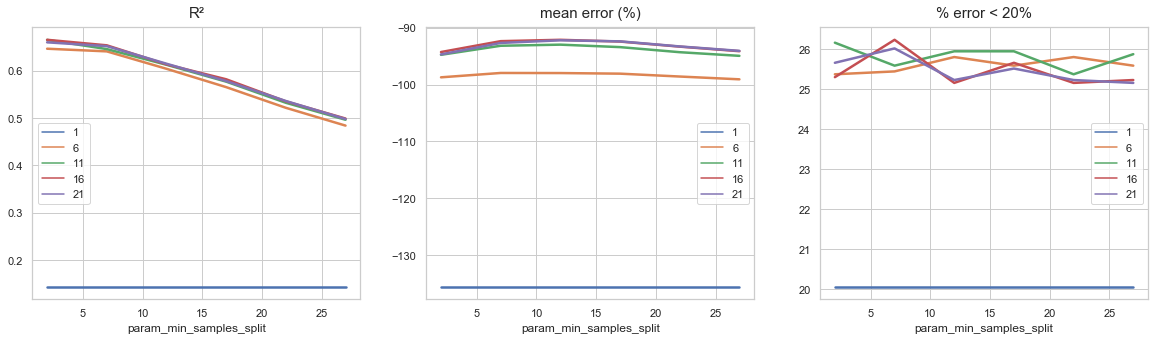

In [183]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=False, figsize=(20,5))
sns.lineplot(data=results_gs_rf_reg_vis.loc[:,'mean_test_R²'], linewidth=2.5, dashes=False, ax=ax1)
ax1.set_title('R²', fontsize=15, pad=10)
sns.lineplot(data=results_gs_rf_reg_vis.loc[:,'mean_test_mean_perc_error_score'], linewidth=2.5, dashes=False, ax=ax2)
ax2.set_title('mean error (%)', fontsize=15, pad=10)
sns.lineplot(data=results_gs_rf_reg_vis.loc[:,'mean_test_perc_error_tresh_score'], linewidth=2.5, dashes=False, ax=ax3)
ax3.set_title('% error < 20%', fontsize=15, pad=10)

In [184]:
# f, ax = plt.subplots(figsize=(5,20))
# sns.set(style="whitegrid")
# features_importance = pd.DataFrame({'feature': X_train.columns.values, 'importance': gs_rf_reg_log.best_estimator_ .feature_importances_})
# sns.barplot(x='importance', y='feature', data=features_importance , color="b",ax=ax)

### Résultats :

In [185]:
global_results_log.columns=['mean_R²','mean_%_mean_error','mean_%_tresh_error','std_R²','std_%_mean_error','std_%_tresh_error']
global_results_log.insert(loc=0, column='model', value=['Lasso_log','G_boost_log','Random_Forest_log'])
global_results_log['mean_%_mean_error'] = -1 * global_results_log['mean_%_mean_error']

In [186]:
log_compare = pd.concat([global_results,global_results_log])
log_compare = log_compare.loc[~log_compare['model'].isin(['Ridge', 'E_net', 'Bagging', 'XGBoost'])]
log_compare.sort_values(by='model', axis=0, inplace=True)
log_compare['Dataset used'] = ['Train', 'Train Log','Train', 'Train Log','Train', 'Train Log']
log_compare['model'] = ['Gboost','Gboost','Lasso','Lasso','Random_Forest','Random_Forest']
display(log_compare)

,model,mean_R²,mean_%_mean_error,mean_%_tresh_error,std_R²,std_%_mean_error,std_%_tresh_error,Dataset used
1,Gboost,0.64,125.89,25.52,0.12,37.69,1.85,Train
1,Gboost,0.70,96.61,25.81,0.11,15.22,1.74,Train Log
41,Lasso,0.59,177.77,17.69,0.15,30.46,0.60,Train
0,Lasso,0.66,90.52,27.10,0.08,20.82,0.62,Train Log
6,Random_Forest,0.69,166.53,22.93,0.06,30.03,0.98,Train
18,Random_Forest,0.67,94.29,25.31,0.05,15.09,2.43,Train Log


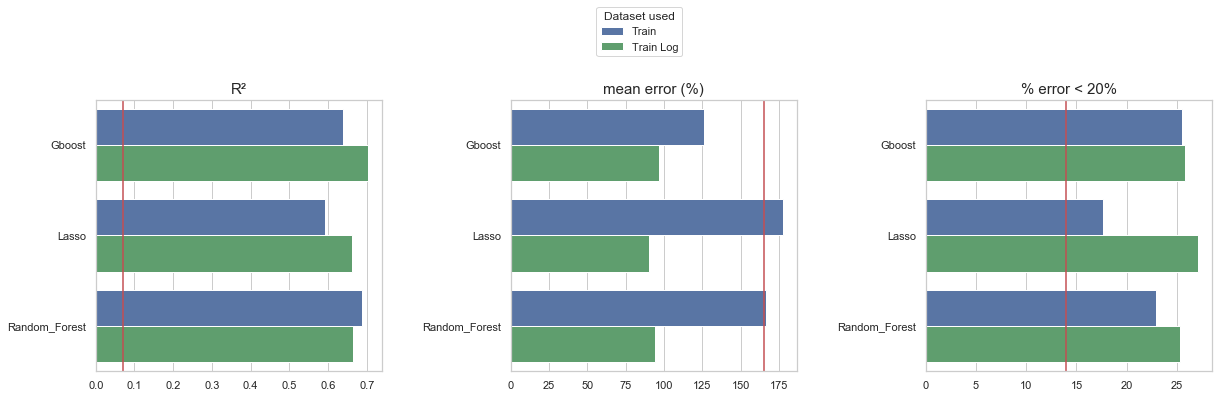

In [187]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=False, figsize=(20,5))
sns.set(style="whitegrid")
plt.subplots_adjust(wspace=0.45, hspace=0.3)
sns.barplot(x='mean_R²', y='model', data=log_compare, hue='Dataset used', ax=ax1, palette=['b','g'])
ax1.set_title('R²', fontsize=15)
ax1.set_xlabel('')
ax1.set_ylabel('')
ax1.legend_.remove()
ax1.axvline(x=0.07, ymin=0, ymax=1, color='r')
sns.barplot(x='mean_%_mean_error', y='model', data=log_compare, hue='Dataset used', ax=ax2, palette=['b','g'])
ax2.set_title('mean error (%)', fontsize=15)
ax2.set_xlabel('')
ax2.set_ylabel('')
ax2.legend(title='Dataset used',loc='center', bbox_to_anchor=(0.45, 1.25), ncol=1)
ax2.axvline(x=165, ymin=0, ymax=1, color='r')
sns.barplot(x='mean_%_tresh_error', y='model', data=log_compare, hue='Dataset used', ax=ax3, palette=['b','g'])
ax3.set_title('% error < 20%', fontsize=15)
ax3.set_xlabel('')
ax3.set_ylabel('')
ax3.legend_.remove()
ax3.axvline(x=14, ymin=0, ymax=1, color='r')

Au final, le passage au Log (en vert) a permis d'augmenter fortement les performances des modèles, notamment en terme d'erreur relative avec division par deux de celle ci dans le cas de la regression Lasso.

## Ajout d'informations :

Une autre manière d'améliorer le modèle peut être de lui ajouter plus de variables explicatives, notamment sur les usages des bâtiments.
  
En effet le dataset possède de nombreuses modalités sur les variables d'usages, un lien de hiérarchie entre elles (Primaire, secondaire, tertiaire) et des surfaces associées, qui n'ont pas pour le moment été prises en compte.  
  
Effectuer un encodage des variables catégorielles d'usage en nombre poserait problème car le modèle considèrerait alors un ordre d'importance au sein de celles ci. L'encodage 'one hot' pourrait remédier à cela mais ferait perdre le lien de classe d'usage pour un même bâtiment (Primaire, secondaire, tertiaire). 
  
Afin de conserver toutes les informations mentionnées, la représentation des données a été modifiée.
De nouvelles variables ont été créées pour chacun des usages possibles, et pour chaque bâtiment on associe à ces variables d'usages la surface du bâtiment qui lui est dédiée. Cela permet de conserver tous les usages ainsi que la notion de hiérarchie entre eux par la proportion de surface qui lui est associé, tout en évitant des redondances dans les usages.  
On ajoutera également le nombre de bâtiments et d'étages.

In [188]:
largest_surface_rep = data.loc[:,['LargestPropertyUseType', 'LargestPropertyUseTypeGFA']]
largest_surface_rep = largest_surface_rep.pivot(columns='LargestPropertyUseType', values = 'LargestPropertyUseTypeGFA')

second_largest_surface_rep = data.loc[:,['SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA']]
second_largest_surface_rep = second_largest_surface_rep.pivot(columns='SecondLargestPropertyUseType', values = 'SecondLargestPropertyUseTypeGFA')

third_largest_surface_rep = data.loc[:,['ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA']]
third_largest_surface_rep = third_largest_surface_rep.pivot(columns='ThirdLargestPropertyUseType', values = 'ThirdLargestPropertyUseTypeGFA')

In [189]:
global_surface_rep = pd.concat([largest_surface_rep,second_largest_surface_rep, third_largest_surface_rep],
                               axis=1)
test = global_surface_rep.groupby(global_surface_rep.columns, axis=1).sum()
test = test.fillna(value=0)

On vérifie ensuite le nom des nouvelles variables ainsi créées :

In [190]:
display(list(test.columns))

['None',
 'adult education',
 'automobile dealership',
 'bank branch',
 'bar/nightclub',
 'college/university',
 'convenience store without gas station',
 'convention center',
 'courthouse',
 'data center',
 'distribution center',
 'enclosed mall',
 'fast food restaurant',
 'financial office',
 'fire station',
 'fitness center/health club/gym',
 'food sales',
 'food service',
 'hospital',
 'hospital (general medical & surgical)',
 'hotel',
 'k-12 school',
 'laboratory',
 'large office',
 'library',
 'lifestyle center',
 'manufacturing/industrial plant',
 'medical office',
 'mixed use property',
 'movie theater',
 'multifamily housing',
 'museum',
 'non-refrigerated warehouse',
 'office',
 'other',
 'other - education',
 'other - entertainment/public assembly',
 'other - lodging/residential',
 'other - mall',
 'other - public services',
 'other - recreation',
 'other - restaurant/bar',
 'other - services',
 'other - technology/science',
 'other - utility',
 'other/specialty hospital',
 

On note qu'il en existe des catégories redondantes, ou bien une qui est inutile car ne donnant aucune informations comme 'None'. Les variables redondantes seront fusionnées, et l'on retirera également la catégorie 'None'.  

In [191]:
test['k-12 school'] = test['sps-district k-12'] + test['k-12 school']
test['hospital (general medical & surgical)'] = test['hospital'] + test['hospital (general medical & surgical)']

In [192]:
test.drop(labels=['None', 'sps-district k-12', 'hospital'], axis=1, inplace=True)

On finalise ensuite la nouvelle représentation des données qui sera fournie au modèle. Pour cela on assemblera trois set de données :

- Un set de features explicatives souhaitées, hors données de surface et d'usage.  
Ici le nombre de bâtiments, d'étages et l'année de construction ont été retenus.
- Le set contenant la nouvelle représentation des variables de surface et d'usage établi au début du 4.2
- Un set contenant la ou les variables cibles. Ici la variable 'SiteEnergyUse(kBtu)' qui donne la consommation totale du bâtiment.

In [193]:
features_list = ['NumberofBuildings','NumberofFloors','YearBuilt']
targets_list = ['SiteEnergyUse(kBtu)']

Certains individus possèdent les mêmes valeurs au niveau de leurs valeurs explicatives mais ont des valeurs cibles différentes. Cela est possible car ils sont présents à la fois dans le set de données de 2015 et 2016. Cette situation est un problème pour la création d'un modèle qui devrait prédire la même valeur cible pour des features identiques. Afin de rémédier à cela, si les variables explicatives sont exactement les mêmes entre deux individus, on les fusionne en calculant la moyenne pour la valeur cible. On passe ainsi à total de 1943 bâtiments disponibles pour la construction du modèle.

In [194]:
transformed_data = pd.concat([test,data.loc[:,features_list], data['SiteEnergyUse(kBtu)']], axis=1)
transformed_data['YearBuilt'] = transformed_data['YearBuilt'].astype(dtype='int32', copy=False)
grouped_transformed_data = transformed_data.groupby(list(transformed_data.iloc[:,:-3].columns), as_index=False)
indexer = []
for key, item in grouped_transformed_data:    
    a = list(grouped_transformed_data.get_group(key).index)
    indexer.append(a[0])
print(len(indexer))
indexed_transformed_data = grouped_transformed_data.mean()
indexed_transformed_data.index = indexer
indexed_transformed_data['YearBuilt'] = indexed_transformed_data['YearBuilt'].astype('category', copy=False)

1943


On sépare ensuite le nouveau dataset en un set d'entrainement et un set de test, en s'assurant que les différents usages primaires des bâtiments soient représentés dans les mêmes proportions dans les deux sets.

In [195]:
X_train_ex, X_test_ex, y_train_ex, y_test_ex = train_test_split(pd.get_dummies(indexed_transformed_data.iloc[:,:-1]), 
                                                    indexed_transformed_data.iloc[:,-1],
                                                    test_size=0.3, random_state=42, 
                                                    stratify=data.loc[list(indexed_transformed_data.index),
                                                                      ['PrimaryPropertyType']])
print('X_train shape : ' + str(X_train_ex.shape))
print('X_test shape : ' + str(X_test_ex.shape))

print('y_train shape : ' + str(y_train_ex.shape))
print('y_test shape : ' + str(y_test_ex.shape))
train_index_ex = list(X_train_ex.index)
test_index_ex = list(X_test_ex.index)

X_train shape : (1360, 83)
X_test shape : (583, 83)
y_train shape : (1360,)
y_test shape : (583,)


In [196]:
global_results_ex = pd.DataFrame(columns=['mean_test_R²','mean_test_mean_perc_error_score','mean_test_perc_error_tresh_score',
                                      'std_test_R²','std_test_mean_perc_error_score','std_test_perc_error_tresh_score'])

### Régression Lasso

In [197]:
lasso = Lasso()
lasso_params = {'alpha': np.logspace(-3, 5, 20)}
gs_lasso_ex = GridSearchCV(lasso, lasso_params, cv=4, return_train_score=True, scoring=scoring, refit='R²')
gs_lasso_ex.fit(X_train_ex, y_train_ex);

In [198]:
results_gs_lasso = pd.DataFrame.from_dict(gs_lasso_ex.cv_results_)
global_results_ex = global_results_ex.append(results_gs_lasso.loc[results_gs_lasso['mean_test_R²']==gs_lasso_ex.best_score_].loc[:,['mean_test_R²',
                                                                                          'mean_test_mean_perc_error_score',
                                                                                          'mean_test_perc_error_tresh_score',
                                                                                        'std_test_R²',
                                                                                        'std_test_mean_perc_error_score',
                                                                                        'std_test_perc_error_tresh_score']])

display(global_results_ex)

,mean_test_R²,mean_test_mean_perc_error_score,mean_test_perc_error_tresh_score,std_test_R²,std_test_mean_perc_error_score,std_test_perc_error_tresh_score
0,0.79,-144.03,23.60,0.10,16.88,1.82


Avec cette transformation, le R² de la regression lasso augmente de manière importante par rapport au modèle qui utilise peu de features (0.79 vs 0.59) et la transformation log(0.79 vs 0.66). On obtient également des meilleures performances sur l'erreur relative, mais elles restent bien moins intéressantes qu'en utilisant le passage au log.

Text(0.5, 1.0, '% error < 20%')

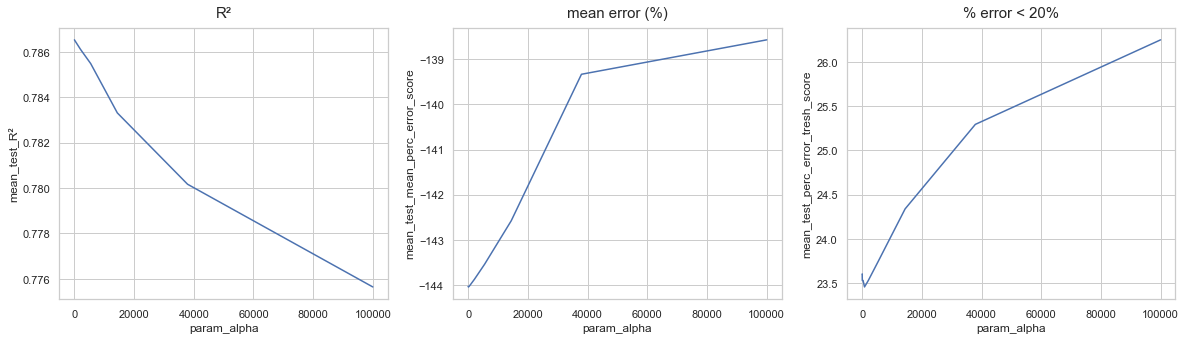

In [199]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=False, figsize=(20,5))
sns.lineplot(x='param_alpha', y='mean_test_R²', data=results_gs_lasso, ax=ax1)
ax1.set_title('R²', fontsize=15, pad=10)
sns.lineplot(x='param_alpha',y='mean_test_mean_perc_error_score', data=results_gs_lasso, ax=ax2)
ax2.set_title('mean error (%)', fontsize=15, pad=10)
sns.lineplot(x='param_alpha',y='mean_test_perc_error_tresh_score', data=results_gs_lasso, ax=ax3)
ax3.set_title('% error < 20%', fontsize=15, pad=10)

### Gradient Boosting :

In [200]:
gboost = GradientBoostingRegressor(n_estimators=300, learning_rate=0.1, random_state=42)

In [201]:
gboost_params = {'loss': ['ls', 'lad', 'huber'], 'max_depth': np.arange(1, 25, 5)}
gs_gboost_ex = GridSearchCV(gboost, gboost_params, cv=4, return_train_score=True, scoring=scoring, refit='R²')
gs_gboost_ex.fit(X_train_ex, y_train_ex);

In [202]:
results_gs_gboost = pd.DataFrame.from_dict(gs_gboost_ex.cv_results_)
results_gs_gboost_vis = results_gs_gboost.loc[:,['param_max_depth', 'param_loss',
                                                 'mean_test_R²','mean_test_mean_perc_error_score',
                                                 'mean_test_perc_error_tresh_score']]

global_results_ex = global_results_ex.append(
    results_gs_gboost.loc[results_gs_gboost['mean_test_R²']==gs_gboost_ex.best_score_].loc[:,['mean_test_R²',
                                                                                              'mean_test_mean_perc_error_score',
                                                                                              'mean_test_perc_error_tresh_score',
                                                                                              'std_test_R²',
                                                                                              'std_test_mean_perc_error_score',
                                                                                              'std_test_perc_error_tresh_score']])

display(global_results_ex)
results_gs_gboost_vis = results_gs_gboost_vis.pivot(index='param_max_depth', columns='param_loss', 
                                                    values=['mean_test_R²','mean_test_mean_perc_error_score',
                                                            'mean_test_perc_error_tresh_score'])

,mean_test_R²,mean_test_mean_perc_error_score,mean_test_perc_error_tresh_score,std_test_R²,std_test_mean_perc_error_score,std_test_perc_error_tresh_score
0,0.79,-144.03,23.60,0.10,16.88,1.82
1,0.57,-107.43,28.90,0.24,14.50,0.92


Cette transformation aura eu pour effet sur le Gradient boosting une baisse du R² (0.57 au lieu de 0.63) et également une réduction de l'erreur relative moyenne (107% au lieu de 125%). Néanmoins l'erreur relative moyenne reste moins intéressante qu'avec la transformaton Log

Text(0.5, 1.0, '% error < 20%')

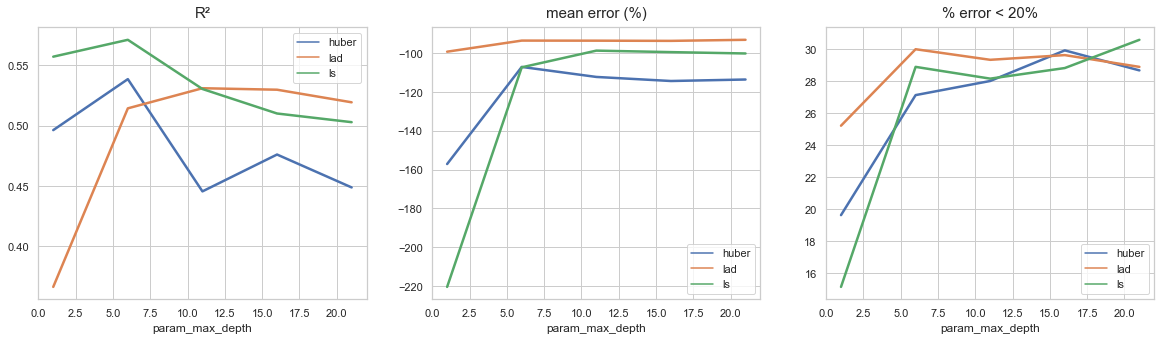

In [203]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=False, figsize=(20,5))
sns.lineplot(data=results_gs_gboost_vis.loc[:,'mean_test_R²'], linewidth=2.5, dashes=False, ax=ax1)
ax1.set_title('R²', fontsize=15, pad=10)
sns.lineplot(data=results_gs_gboost_vis.loc[:,'mean_test_mean_perc_error_score'], linewidth=2.5, dashes=False, ax=ax2)
ax2.set_title('mean error (%)', fontsize=15, pad=10)
sns.lineplot(data=results_gs_gboost_vis.loc[:,'mean_test_perc_error_tresh_score'], linewidth=2.5, dashes=False, ax=ax3)
ax3.set_title('% error < 20%', fontsize=15, pad=10)

In [204]:
# f, ax = plt.subplots(figsize=(5,20))
# sns.set(style="whitegrid")
# features_importance = pd.DataFrame({'feature': X_train_ex.columns.values, 'importance': gs_gboost_ex.best_estimator_ .feature_importances_})
# sns.barplot(x='importance', y='feature', data=features_importance , color="b",ax=ax)

### Random Forest

In [205]:
rf_reg = RandomForestRegressor(n_estimators=300, random_state=42)
rf_reg_params = {'min_samples_split': range(2, 32, 5), 'max_depth': np.arange(1, 25, 5)}
gs_rf_reg_ex = GridSearchCV(rf_reg, rf_reg_params, cv=4, return_train_score=True, scoring=scoring, refit='R²')
gs_rf_reg_ex.fit(X_train_ex, y_train_ex);

In [206]:
results_gs_rf_reg = pd.DataFrame.from_dict(gs_rf_reg_ex.cv_results_)

In [207]:
results_gs_rf_reg_vis = results_gs_rf_reg.loc[:,['param_min_samples_split', 'param_max_depth',
                                                 'mean_test_R²','mean_test_mean_perc_error_score',
                                                 'mean_test_perc_error_tresh_score']]

global_results_ex = global_results_ex.append(
    results_gs_rf_reg.loc[results_gs_rf_reg['mean_test_R²']==gs_rf_reg_ex.best_score_].loc[:,['mean_test_R²',
                                                                                              'mean_test_mean_perc_error_score',
                                                                                              'mean_test_perc_error_tresh_score',
                                                                                              'std_test_R²',
                                                                                              'std_test_mean_perc_error_score',
                                                                                              'std_test_perc_error_tresh_score']])

display(global_results_ex)
results_gs_rf_reg_vis = results_gs_rf_reg_vis.pivot(index='param_min_samples_split', columns='param_max_depth', 
                                                    values=['mean_test_R²','mean_test_mean_perc_error_score',
                                                            'mean_test_perc_error_tresh_score'])

,mean_test_R²,mean_test_mean_perc_error_score,mean_test_perc_error_tresh_score,std_test_R²,std_test_mean_perc_error_score,std_test_perc_error_tresh_score
0,0.79,-144.03,23.60,0.10,16.88,1.82
1,0.57,-107.43,28.90,0.24,14.50,0.92
24,0.50,-149.56,23.75,0.20,18.73,1.31


Cette transformation a eu pour effet sur la Random Forest une baisse siginficaive du R² (0.5 au lieu de 0.68) et une légère baisse de l'erreur relative moyenne (149% au lieu de 166%). Ces performances restent bien moins intéressantes que celle obtenues avec la transformation Log.

Text(0.5, 1.0, '% error < 20%')

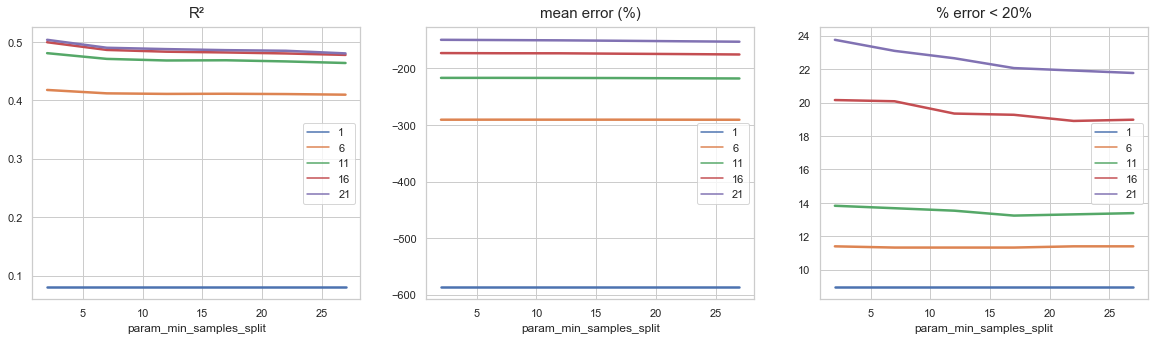

In [208]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=False, figsize=(20,5))
sns.lineplot(data=results_gs_rf_reg_vis.loc[:,'mean_test_R²'], linewidth=2.5, dashes=False, ax=ax1)
ax1.set_title('R²', fontsize=15, pad=10)
sns.lineplot(data=results_gs_rf_reg_vis.loc[:,'mean_test_mean_perc_error_score'], linewidth=2.5, dashes=False, ax=ax2)
ax2.set_title('mean error (%)', fontsize=15, pad=10)
sns.lineplot(data=results_gs_rf_reg_vis.loc[:,'mean_test_perc_error_tresh_score'], linewidth=2.5, dashes=False, ax=ax3)
ax3.set_title('% error < 20%', fontsize=15, pad=10)

In [209]:
# f, ax = plt.subplots(figsize=(5,20))
# sns.set(style="whitegrid")
# features_importance = pd.DataFrame({'feature': X_train_ex.columns.values, 'importance': gs_rf_reg_ex.best_estimator_ .feature_importances_})
# sns.barplot(x='importance', y='feature', data=features_importance , color="b",ax=ax)

### Résultats

In [210]:
global_results_ex.columns=['mean_R²','mean_%_mean_error','mean_%_tresh_error','std_R²','std_%_mean_error','std_%_tresh_error']
global_results_ex.insert(loc=0, column='model', value=['Lasso_ex','G_boost_ex','Random_Forest_ex'])
global_results_ex['mean_%_mean_error'] = -1 * global_results_ex['mean_%_mean_error']

In [211]:
ex_compare = pd.concat([global_results,global_results_ex])
ex_compare = ex_compare.loc[~ex_compare['model'].isin(['Ridge', 'E_net', 'Bagging', 'XGBoost'])]
ex_compare.sort_values(by='model', axis=0, inplace=True)
ex_compare['Dataset used'] = ['Train', 'Train Features adding','Train', 'Train Features adding','Train', 
                              'Train Features adding']
ex_compare['model'] = ['Gboost','Gboost','Lasso','Lasso','Random_Forest','Random_Forest']
display(ex_compare)

,model,mean_R²,mean_%_mean_error,mean_%_tresh_error,std_R²,std_%_mean_error,std_%_tresh_error,Dataset used
1,Gboost,0.64,125.89,25.52,0.12,37.69,1.85,Train
1,Gboost,0.57,107.43,28.90,0.24,14.50,0.92,Train Features adding
41,Lasso,0.59,177.77,17.69,0.15,30.46,0.60,Train
0,Lasso,0.79,144.03,23.60,0.10,16.88,1.82,Train Features adding
6,Random_Forest,0.69,166.53,22.93,0.06,30.03,0.98,Train
24,Random_Forest,0.50,149.56,23.75,0.20,18.73,1.31,Train Features adding


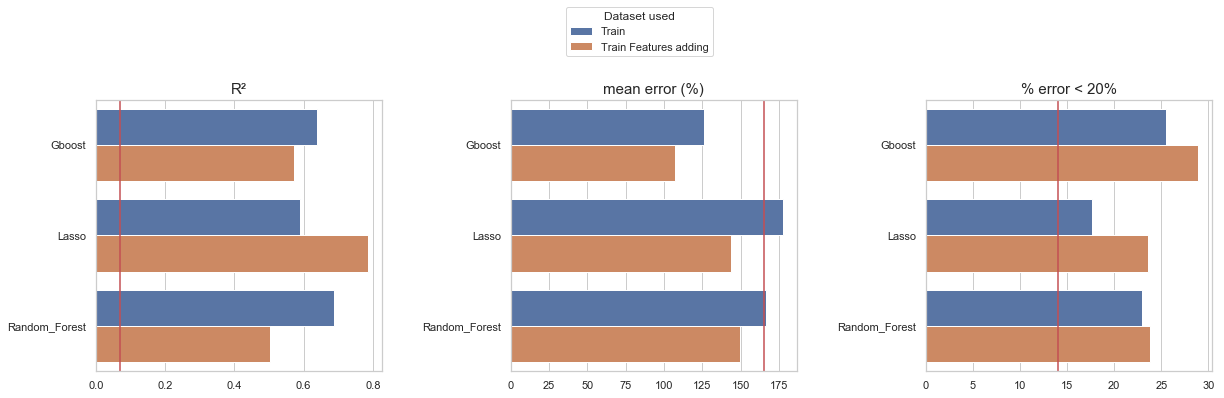

In [212]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=False, figsize=(20,5))
sns.set(style="whitegrid")
plt.subplots_adjust(wspace=0.45, hspace=0.3)
sns.barplot(x='mean_R²', y='model', data=ex_compare, hue='Dataset used', ax=ax1)
ax1.set_title('R²', fontsize=15)
ax1.set_xlabel('')
ax1.set_ylabel('')
ax1.legend_.remove()
ax1.axvline(x=0.07, ymin=0, ymax=1, color='r')
sns.barplot(x='mean_%_mean_error', y='model', data=ex_compare, hue='Dataset used', ax=ax2)
ax2.set_title('mean error (%)', fontsize=15)
ax2.set_xlabel('')
ax2.set_ylabel('')
ax2.legend(title='Dataset used',loc='center', bbox_to_anchor=(0.45, 1.25), ncol=1)
ax2.axvline(x=165, ymin=0, ymax=1, color='r')
sns.barplot(x='mean_%_tresh_error', y='model', data=ex_compare, hue='Dataset used', ax=ax3)
ax3.set_title('% error < 20%', fontsize=15)
ax3.set_xlabel('')
ax3.set_ylabel('')
ax3.legend_.remove()
ax3.axvline(x=14, ymin=0, ymax=1, color='r')

Au final, l'ajout de features a eu pour effet amélioration de l'erreur relative moyenne, et une baisse du R², si ce n'est pour la regression Lasso où le R² a lui fortement augmenté. La baisse de l'erreur relative moyenne reste néanmoins moins intéressante que celle constatée avec le passage au log.

## Comparatif des performances :

Pour résumer cette partie 'Essais d'optimisation' on peut regarder le graphique ci dessous, qui reprend les performances obtenues pour chacun des trois modèles sans modifications, avec passage au log et avec ajout de features (la ligne rouge représente les performances du régresseur naif sur le train set) :

In [213]:
final_results = pd.concat([global_results,global_results_log,global_results_ex])
final_results = final_results.loc[~final_results['model'].isin(['Ridge', 'E_net', 'Bagging', 'XGBoost'])]
final_results.sort_values(by='model', axis=0, inplace=True)
final_results['Dataset used'] = ['Train', 'Train Features adding', 'Train Log','Train', 'Train Features adding', 
                                   'Train Log','Train', 'Train Features adding', 'Train Log']
final_results['model'] = ['Gboost','Gboost','Gboost','Lasso','Lasso','Lasso','Random_Forest','Random_Forest',
                          'Random_Forest']
display(final_results)

,model,mean_R²,mean_%_mean_error,mean_%_tresh_error,std_R²,std_%_mean_error,std_%_tresh_error,Dataset used
1,Gboost,0.64,125.89,25.52,0.12,37.69,1.85,Train
1,Gboost,0.57,107.43,28.90,0.24,14.50,0.92,Train Features adding
1,Gboost,0.70,96.61,25.81,0.11,15.22,1.74,Train Log
41,Lasso,0.59,177.77,17.69,0.15,30.46,0.60,Train
0,Lasso,0.79,144.03,23.60,0.10,16.88,1.82,Train Features adding
0,Lasso,0.66,90.52,27.10,0.08,20.82,0.62,Train Log
6,Random_Forest,0.69,166.53,22.93,0.06,30.03,0.98,Train
24,Random_Forest,0.50,149.56,23.75,0.20,18.73,1.31,Train Features adding
18,Random_Forest,0.67,94.29,25.31,0.05,15.09,2.43,Train Log


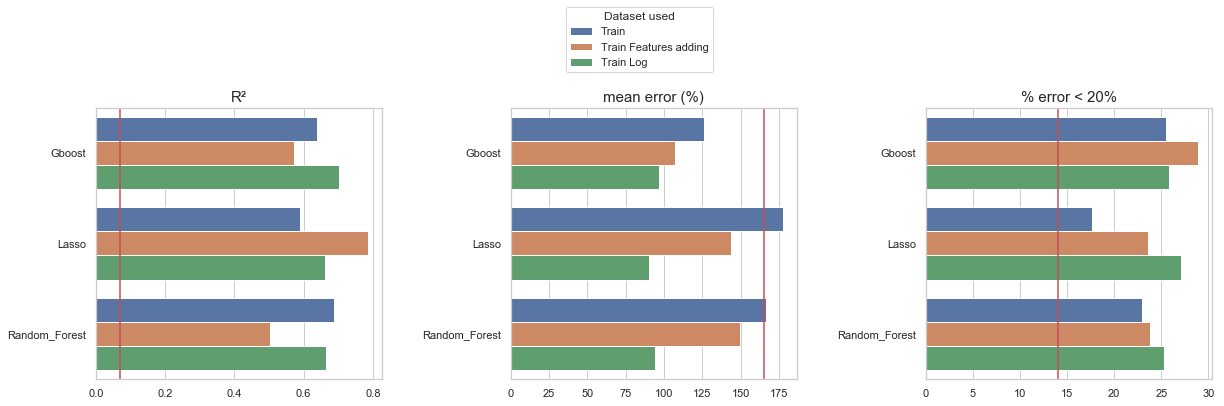

In [214]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=False, figsize=(20,5))
sns.set(style="whitegrid")
plt.subplots_adjust(wspace=0.45, hspace=0.3)
sns.barplot(x='mean_R²', y='model', data=final_results, hue='Dataset used', ax=ax1)
ax1.set_title('R²', fontsize=15)
ax1.set_xlabel('')
ax1.set_ylabel('')
ax1.legend_.remove()
ax1.axvline(x=0.07, ymin=0, ymax=1, color='r')
sns.barplot(x='mean_%_mean_error', y='model', data=final_results, hue='Dataset used', ax=ax2)
ax2.set_title('mean error (%)', fontsize=15)
ax2.set_xlabel('')
ax2.set_ylabel('')
ax2.legend(title='Dataset used',loc='center', bbox_to_anchor=(0.45, 1.25), ncol=1)
ax2.axvline(x=165, ymin=0, ymax=1, color='r')
sns.barplot(x='mean_%_tresh_error', y='model', data=final_results, hue='Dataset used', ax=ax3)
ax3.set_title('% error < 20%', fontsize=15)
ax3.set_xlabel('')
ax3.set_ylabel('')
ax3.legend_.remove()
ax3.axvline(x=14, ymin=0, ymax=1, color='r')

Au final, la régression Lasso obtient les meilleurs résultats, que ce soit sur le R² ou bien l'erreur relative moyenne. La bonne performance sur le R² est obtenue en ajoutant des variables d'usage et celle sur l'erreur relative moyenne en effectuant le passage au log.

# Choix de modèle et essai sur le set de test

Pour estimer au mieux la consommation d'un bâtiment, il est dans ce cas plus intéressant de choisir le modèle avec l'erreur relative moyenne la plus faible. La régression Lasso répond le mieux à la problématique, en utilisant comme variables explicatives seulement la surface, l'usage et la date de construction du bâtiment. Il faut de plus apppliquer une transformation logarithmique à la variable explicative de surface et à celle cible de la consommation.

Pour finaliser cette étude, on se penchera donc sur ce cas de figure, et l'on validera le modèle retenu en l'appliquant sur le set de test. Afin de quantifier l'apport de ce modèle sur le set de test, on utilise un régresseur naïf prédisant la médiane pour chaque observation sur ce dernier. Ces valeurs serviront d'étalons de performances.

In [215]:
r2_dum_test = r2_score(y_test, dum.predict(X_test))
print("R² test set dummy regressor : " + str(r2_dum_test))

R² test set dummy regressor : -0.03063545508521237


In [216]:
mean_error_dum_test =f_mean_perc_error(y_test, dum.predict(X_test))
print("mean error test set dummy regressor :" + str(mean_error_dum_test))

mean error test set dummy regressor :151.1606559789836


In [217]:
error_tresh_dum_test = f_perc_error_tresh(y_test, dum.predict(X_test))
print("% error < 20% test set dummy regressor : " + str(error_tresh_dum_test))

% error < 20% test set dummy regressor : 15.242881072026801


## Prédiction de la consommation sur le set de test

On applique le modèle sur le set de test associé à la transformation Log (X_test_log et y_test_log) :

In [218]:
r2_lasso_log = R2_log(y_test_log, gs_lasso_log.predict(X_test_log))
error_tresh_lasso_log = f_perc_error_tresh_log(y_test_log, gs_lasso_log.predict(X_test_log))
mean_error_lasso_log = f_mean_perc_error_log(y_test_log, gs_lasso_log.predict(X_test_log))
print("R² test set :" + str(r2_lasso_log))
print("mean error test set :" + str(mean_error_lasso_log))

R² test set :0.5813281705113352
mean error test set :80.17701332707125


Fait notable, la performance est meilleure sur le set de test que sur le set d'entrainement (80% au lieu de 90%). Cela s'explique potentiellement par la présence de points plus marginaux dans le set d'entrainement que dans le set de test.

In [219]:
lasso_log_perf = final_results.loc[final_results['model'] == 'Lasso'].copy()
lasso_log_perf.drop(labels=['std_R²', 'std_%_mean_error', 'std_%_tresh_error'], axis=1, inplace=True)
lasso_log_perf = lasso_log_perf.append({'model' : 'Lasso' , 'mean_R²' : r2_lasso_log, 'mean_%_mean_error' : mean_error_lasso_log,
                                    'mean_%_tresh_error': error_tresh_lasso_log, 'Dataset used': 'Test Log'},ignore_index=True)
lasso_log_perf = lasso_log_perf.loc[lasso_log_perf['Dataset used'] != 'Train Features adding']

On retrouve sur le graphique ci dessous un résumé des performances du modèle. En bleu la performance moyenne du modèle après une GridSearch Cross Validation à 4 folds, en orange la performance du modèle selon la même méthodologie de validation avec le set d'entrainement contenant peu de features et l'utilisation du Log. Enfin en vert on trouve la performance finale obtenue sur le set de test avec transformation log.

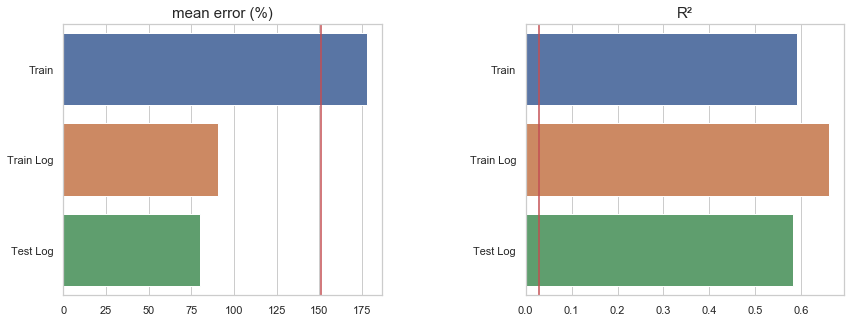

In [220]:
f, (ax1, ax2) = plt.subplots(1,2, figsize=(14,5))
sns.set(style="whitegrid")
plt.subplots_adjust(wspace=0.45, hspace=0.3)
sns.barplot(x='mean_%_mean_error', y='Dataset used', data=lasso_log_perf, ax=ax1);
ax1.set_title('mean error (%)', fontsize=15)
ax1.set_xlabel('')
ax1.set_ylabel('')
ax1.axvline(x=151, ymin=0, ymax=1, color='r')
sns.barplot(x='mean_R²', y='Dataset used', data=lasso_log_perf, ax=ax2);
ax2.set_title('R²', fontsize=15)
ax2.set_xlabel('')
ax2.set_ylabel('')
ax2.axvline(x=0.03, ymin=0, ymax=1, color='r')

Pour comprendre un peu mieux cette erreur relative moyenne de 80%, on peut s'intéresser à la performance du modèle par catégorie d'usage de bâtiment :

In [221]:
error = abs(y_test - np.exp(gs_lasso_log.predict(X_test_log))) / y_test * 100
results_final = pd.concat([data.loc[test_index,['PrimaryPropertyType']],error], axis=1)
display(results_final.groupby('PrimaryPropertyType').agg([ np.mean, np.std, lambda x: x.count()]))

SiteEnergyUse(kBtu)                  
                                           mean      std <lambda>
PrimaryPropertyType                                              
distribution center                       54.89    53.19    16.00
hospital                                  80.94    92.33     4.00
hotel                                     36.67    27.11    24.00
k-12 school                               27.22    20.56    43.00
laboratory                                12.76    12.79     3.00
large office                              35.98    38.17    59.00
low-rise multifamily                      75.47      nan     1.00
medical office                            45.75    35.20    13.00
mixed use property                        58.80    66.59    37.00
non-refrigerated warehouse                76.76    90.00    56.00
other                                    177.64   893.24    85.00
refrigerated warehouse                 1,133.95 2,195.13     4.00
residence hall/dormitory                  39.09    27.56     7.00
restaurant                                79.41    70.18     4.00
retail store                              55.72    66.07    31.00
self-storage facility                    148.59   167.46     9.00
senior care community                     76.23   120.64     9.00
small- and mid-sized office               35.70    35.27    94.00
supermarket/grocery store                 22.26    17.05    13.00
university                                24.75    20.75     8.00
warehouse                                121.05   162.24    55.00
worship facility                          37.66    40.83    22.00

On peut noter plusieurs points intéressants à partir de ce tableau :  
- De manière générale, les catégories d'usage bien défini (Laboratoire, école, bureaux ...) ont de bonnes performances.
- A l'inverse, les catégories de bâtiment plus floues comme 'Warehouse', 'self-storage facility', 'other' et 'refrigerated warehouse' ont des performances plus faibles.


## Déduction des émissions de CO2

On peut ensuite convertir ces prédictions de consommation en prédictions d'émissions :

In [222]:
ratio = data.loc[test_index,['elec_ratio', 'gas_ratio', 'steam_ratio']]
pred = np.exp(gs_lasso_log.predict(X_test_log))
emmissions_pred = pd.DataFrame(columns=['elec_co2_em','gas_co2_em','steam_co2_em'])
emmissions_pred['elec_co2_em'] = 0.0000069710953 * ratio['elec_ratio'] * pred
emmissions_pred['gas_co2_em'] = 0.00005311 * ratio['gas_ratio'] * pred
emmissions_pred['steam_co2_em'] = 0.0000771877506 * ratio['steam_ratio'] * pred
emmissions_pred['total_co2_em'] = emmissions_pred.loc[:,['elec_co2_em','gas_co2_em','steam_co2_em']].sum(axis=1)
real = data.loc[test_index,['GHGEmissions(MetricTonsCO2e)']]
error = abs(real.values - emmissions_pred['total_co2_em'].values.reshape(-1, 1)) / real * 100
display(error.mean())

GHGEmissions(MetricTonsCO2e)   80.31
dtype: float64

In [223]:
results_final = pd.concat([data.loc[test_index,['PrimaryPropertyType']],error], axis=1)
display(results_final.groupby('PrimaryPropertyType').agg([ np.mean, np.std, lambda x: x.count()]))

GHGEmissions(MetricTonsCO2e)                  
                                                    mean      std <lambda>
PrimaryPropertyType                                                       
distribution center                                54.91    53.25    16.00
hospital                                           80.95    92.35     4.00
hotel                                              36.67    27.11    24.00
k-12 school                                        27.22    20.56    43.00
laboratory                                         12.76    12.79     3.00
large office                                       35.98    38.17    59.00
low-rise multifamily                               75.48      nan     1.00
medical office                                     45.76    35.21    13.00
mixed use property                                 58.80    66.59    37.00
non-refrigerated warehouse                         76.72    89.84    56.00
other                                             177.30   889.90    85.00
refrigerated warehouse                          1,140.79 2,208.81     4.00
residence hall/dormitory                           39.09    27.57     7.00
restaurant                                         79.42    70.20     4.00
retail store                                       55.72    66.05    31.00
self-storage facility                             148.75   167.51     9.00
senior care community                              76.24   120.66     9.00
small- and mid-sized office                        35.71    35.27    94.00
supermarket/grocery store                          23.92    16.67    12.00
university                                         24.75    20.75     8.00
warehouse                                         121.12   162.43    55.00
worship facility                                   37.68    40.89    22.00

On obtient les mêmes performances en termes d'erreur relative moyenne pour la prédiction d'émissions que pour la consommation (80%).

# Bilan et perspectives :

## Performances obtenues 

En conclusion, la régression Lasso est le modèle qui apporte les meilleures performances.  
Utiliser peu de variables explicatives (surface, usage principal, année de construction) et le passage au log pour ceratines variables permet de prédire avec une erreur relative moyenne de 80%. Néanmmoins on observe que le modèle est efficace pour certaines catégories de bâtiments (Ecole, bureaux, supermarchés) et beaucoup moins pour des usages plus larges comme le stockage. On retrouve le même comportement dans la prédiction des émissions de CO2 que dans celle de la consommation.  
  
  
L'erreur relative moyenne reste importante, et il est possible que nous manquions d'informations pour quantifier la consommation des bâtiments qui ont les mêmes données structurelles et d'usages, par exemple :
- Les horaires d'activités, un bâtiment ouvert 24h/24h n'aura pas la même consommation que celui qui n'ouvre que 8h par jour.
- Le nombre de personnes à l'intérieur du bâtiment
- La gestion de la température (type de chauffage, climatisation, réfrigération ...)
- L'exposition au soleil / vitrage
- L'enveloppe du bâtiment

## Améliorations possibles

Il est possible d'envisager plusieurs améliorations afin d'améliorer les performances, comme entre autres :  

- Identifier et retirer des outliers par catégorie de bâtiment, en se basant sur le ratio consommation / surface. Cela a été testé et non présenté dans ce notebook car pas d'améliorations des performances constatées. Le critère d'élimination était un Zscore supérieur à 3 pour le ratio consommation / surface au sein d'une même catégorie de bâtiment. Le choix d'un autre critère néanmoins pourrait peut être aider à l'apprentissage du modèle.  
  
  
- Séparation du dataset en 3 parties selon la taille des batiments, afin d'essayer de corriger les variations importantes constatées sur les petites valeurs. Cela a été testé rapidement mais non présenté dans ce notebook car ne permettant pas l'amélioration des résultats. Le dataset a été séparé en trois, le premier quartile de surface seul, le second et troisième ensemble et enfin le dernier quartile seul. Un autre critère de séparaton du dataset pourrait permettre une meilleure partition et une augmentation des performances.  
  
  
- Passage au log pour le modèle utilisant toutes les features d'usage et de surface (Cela a été testé mais non présenté dans ce notebook, permettant une baisse de l'erreur moyenne sur les méthodes ensembliste, jusqu'à 75% sur le train set).  
  
  

- Effectuer une modélisation de l'énergie consommée par type d'usage de bâtiment, comme c'est le cas pour le calcul de l'Energy Star Score. En effet chaque usage de bâtiment n'est pas forcément drivé par les mêmes variables explicatives.  
  
  

- Ajout de données : Il serait possible d'ajouter des bâtiment issus de dataset similaires pour d'autres villes avec même climat et les mêmes informations disponibles. On pourrait également envisager d'ajouter des features avec les data disponibles pour le calcul de l'Energy Star score (nombre de personnes, horaires d'ouverture ...) qui pourraient permettre un réglage plus fin du modèle.